In [1]:
pip install klib

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
from matplotlib import pyplot as plt # visualization
import klib # visualization
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

In [3]:
data = pd.read_excel('/content/train.xlsm',index_col='ID')


In [4]:
OriginalShape = data.shape
print('The original shape of the dataset is ', OriginalShape[0],'rows and',OriginalShape[1],'columns')

The original shape of the dataset is  67463 rows and 34 columns


In [5]:
data.isnull().sum() #The above information shows that there are no missing values in both train and test dataset.

Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay                   0
Accounts Delin

In [6]:
data.head ()

Loan Amount  Funded Amount  Funded Amount Investor  Term  \
ID                                                                   
65087372        10000          32236             12329.36286    59   
1450153          3609          11940             12191.99692    59   
1969101         28276           9311             21603.22455    59   
6651430         11170           6954             17877.15585    59   
14354669        16890          13226             13539.92667    59   

         Batch Enrolled  Interest Rate Grade Sub Grade Employment Duration  \
ID                                                                           
65087372     BAT2522922      11.135007     B        C4            MORTGAGE   
1450153      BAT1586599      12.237563     C        D3                RENT   
1969101      BAT2136391      12.545884     F        D4            MORTGAGE   
6651430      BAT2428731      16.731201     C        C3            MORTGAGE   
14354669     BAT5341619      15.008300     C        D4            MORTGAGE   

          Home Ownership  ...   Recoveries Collection Recovery Fee  \
ID                        ...                                        
65087372    176346.62670  ...     2.498291                0.793724   
1450153      39833.92100  ...     2.377215                0.974821   
1969101      91506.69105  ...     4.316277                1.020075   
6651430     108286.57590  ...     0.107020                0.749971   
14354669     44234.82545  ...  1294.818751                0.368953   

         Collection 12 months Medical  Application Type  Last week Pay  \
ID                                                                       
65087372                            0        INDIVIDUAL             49   
1450153                             0        INDIVIDUAL            109   
1969101                             0        INDIVIDUAL             66   
6651430                             0        INDIVIDUAL             39   
14354669                            0        INDIVIDUAL             18   

          Accounts Delinquent  Total Collection Amount  Total Current Balance  \
ID                                                                              
65087372                    0                       31                 311301   
1450153                     0                       53                 182610   
1969101                     0                       34                  89801   
6651430                     0                       40                   9189   
14354669                    0                      430                 126029   

          Total Revolving Credit Limit  Loan Status  
ID                                                   
65087372                          6619            0  
1450153                          20885            0  
1969101                          26155            0  
6651430                          60214            0  
14354669                         22579            0  

[5 rows x 34 columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67463 entries, 65087372 to 65443173
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Amount                   67463 non-null  int64  
 1   Funded Amount                 67463 non-null  int64  
 2   Funded Amount Investor        67463 non-null  float64
 3   Term                          67463 non-null  int64  
 4   Batch Enrolled                67463 non-null  object 
 5   Interest Rate                 67463 non-null  float64
 6   Grade                         67463 non-null  object 
 7   Sub Grade                     67463 non-null  object 
 8   Employment Duration           67463 non-null  object 
 9   Home Ownership                67463 non-null  float64
 10  Verification Status           67463 non-null  object 
 11  Payment Plan                  67463 non-null  object 
 12  Loan Title                    67463 non-null  obje

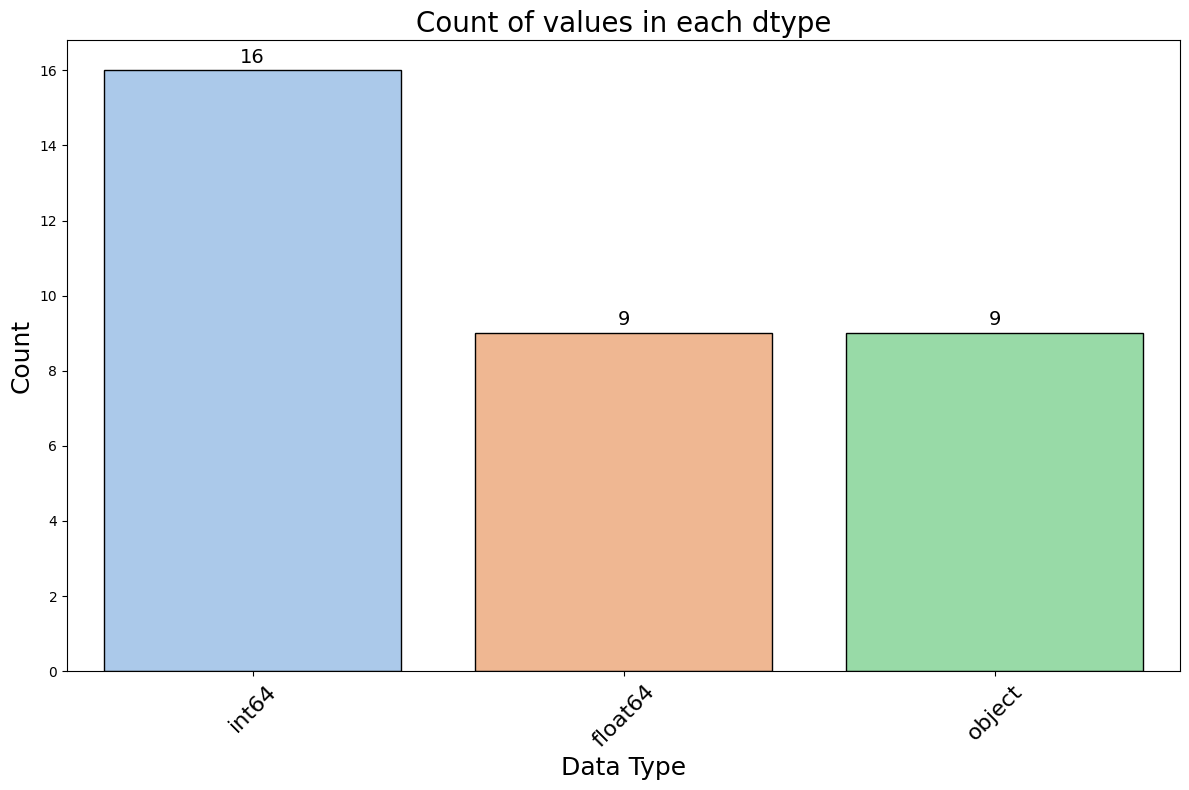

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set pastel color palette
sns.set_palette("pastel")

# Get dtype counts from 'data' DataFrame
dtype_counts = data.dtypes.value_counts()

# Create the bar plot
plt.figure(figsize=(12, 8))
bars = sns.barplot(x=dtype_counts.index, y=dtype_counts.values, edgecolor='black')

# Title and labels with increased font size
plt.title('Count of values in each dtype', fontsize=20)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Data Type', fontsize=18)
plt.xticks(rotation=45, fontsize=16)

# Annotate bars with their respective values, with increased font size
for bar in bars.patches:
    height = bar.get_height()
    bars.text(bar.get_x() + bar.get_width() / 2, height + 0.1, int(height),
              ha='center', va='bottom', fontsize=14, color='black')

plt.tight_layout()
plt.show()


In [9]:
for col in data.select_dtypes(include="object").columns.values:
  print("=="*50)
  print(col)
  print(data[col].value_counts())
  print("=="*50)

Batch Enrolled
BAT3873588    3626
BAT1586599    3142
BAT1104812    2996
BAT2252229    2557
BAT2803411    2425
BAT1780517    2403
BAT1184694    2298
BAT2078974    2290
BAT2575549    2257
BAT4694572    2248
BAT4271519    2054
BAT2558388    1963
BAT3193689    1864
BAT1930365    1844
BAT2136391    1790
BAT2333412    1775
BAT3726927    1774
BAT4136152    1766
BAT5341619    1717
BAT5525466    1709
BAT5489674    1677
BAT5629144    1639
BAT1766061    1461
BAT2833642    1421
BAT5924421    1404
BAT2522922    1399
BAT2428731    1398
BAT4808022    1303
BAT4351734    1140
BAT5547201    1127
BAT5714674    1105
BAT3461431    1068
BAT224923      895
BAT1761981     894
BAT4722912     887
BAT2003848     842
BAT1467036     802
BAT5849876     768
BAT3865626     728
BAT5811547     711
BAT1135695     296
Name: Batch Enrolled, dtype: int64
Grade
C    19085
B    18742
A    12055
D     8259
E     6446
F     2246
G      630
Name: Grade, dtype: int64
Sub Grade
B4    4462
C1    4188
B3    3999
A5    3540
B2    35

In [10]:
#Descriptive statistics
data.describe().style.background_gradient(cmap = 'Pastel2')

## Note

# 1. There is not much variation in the "Term" feature.
# 2. It seems there are Outliers in the "Interest Rate" feature since there is a significant difference in min and max.
# 3. Same is the case with "Debit to Income" feature.
# 4. Prima facie, "Delinquency - two years" and "Inquires - six months Open " has highly skewed data.

In [11]:
# Descriptive statistics
for col in data.select_dtypes(exclude="object").columns.values:
  print("=="*50)
  print(col)
  print(data[col].describe())
  print("=="*50)

Loan Amount
count    67463.000000
mean     16848.902776
std       8367.865726
min       1014.000000
25%      10012.000000
50%      16073.000000
75%      22106.000000
max      35000.000000
Name: Loan Amount, dtype: float64
Funded Amount
count    67463.000000
mean     15770.599114
std       8150.992662
min       1014.000000
25%       9266.500000
50%      13042.000000
75%      21793.000000
max      34999.000000
Name: Funded Amount, dtype: float64
Funded Amount Investor
count    67463.000000
mean     14621.799323
std       6785.345170
min       1114.590204
25%       9831.684984
50%      12793.682170
75%      17807.594120
max      34999.746430
Name: Funded Amount Investor, dtype: float64
Term
count    67463.000000
mean        58.173814
std          3.327441
min         36.000000
25%         58.000000
50%         59.000000
75%         59.000000
max         59.000000
Name: Term, dtype: float64
Interest Rate
count    67463.000000
mean        11.846258
std          3.718629
min          5.32000

In [12]:
data["Loan Status"].value_counts()  #The above distribtuion shows that there is a class imbalance between the two classes.
#The distribution is biased to the Class 0.

0    61222
1     6241
Name: Loan Status, dtype: int64

In [13]:
data=data.rename(columns={'Employment Duration':'Home Ownership',
                            'Home Ownership':'Employment Duration'#
                            })

In [14]:
def cat_plot(df,catcol,title='',**arg):
  _=plt.figure(figsize=(8,5))
  _=sns.countplot(data=df,x=catcol,order=df[catcol].value_counts().index,**arg)
  _=plt.title(title,fontsize=25)
  _=plt.xlabel(catcol,fontsize=15)
  _=plt.xticks(fontsize=10, rotation=90)

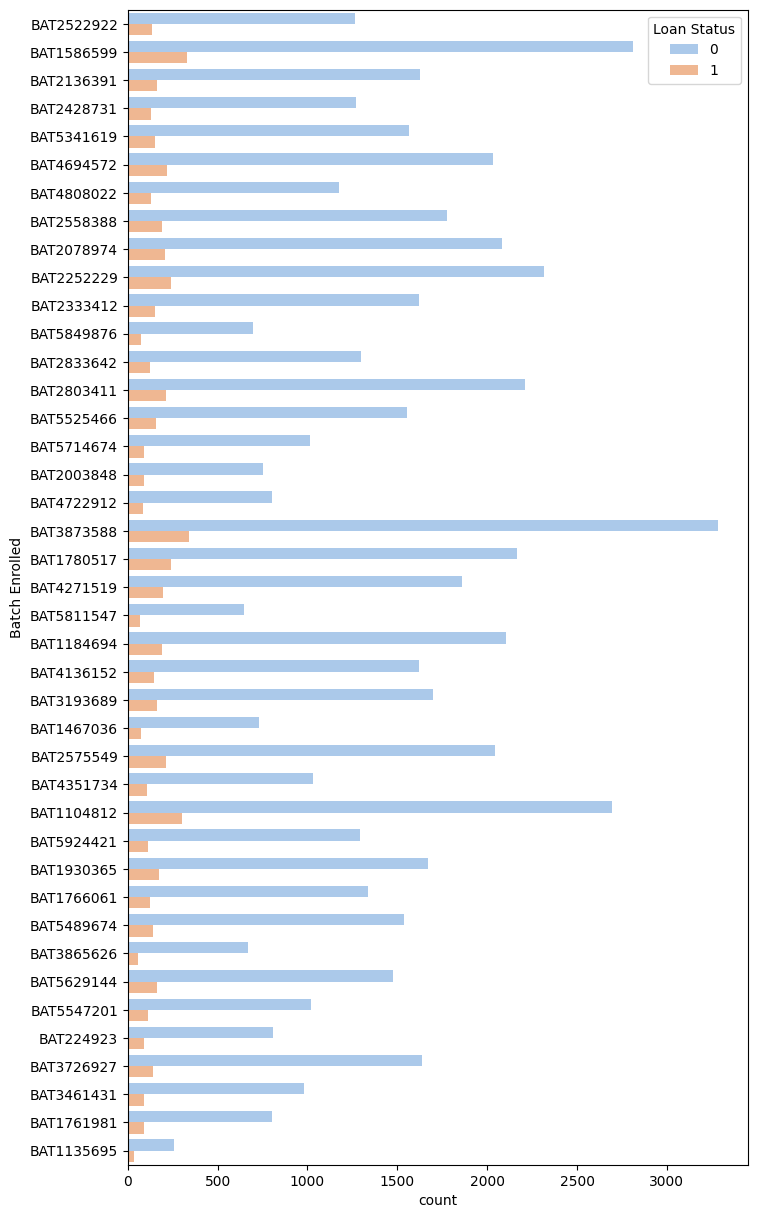

In [15]:
#Loan title contains so many repeated categories in lower and upper case letter foramt.So let's ignore the Loan Title column then plot remaining category columns.

_=plt.figure(figsize=(8,15))
_=sns.countplot(y=data['Batch Enrolled'],hue=data['Loan Status'].astype('object'))

In [16]:
data.select_dtypes(include="object").columns.values

array(['Batch Enrolled', 'Grade', 'Sub Grade', 'Home Ownership',
       'Verification Status', 'Payment Plan', 'Loan Title',
       'Initial List Status', 'Application Type'], dtype=object)

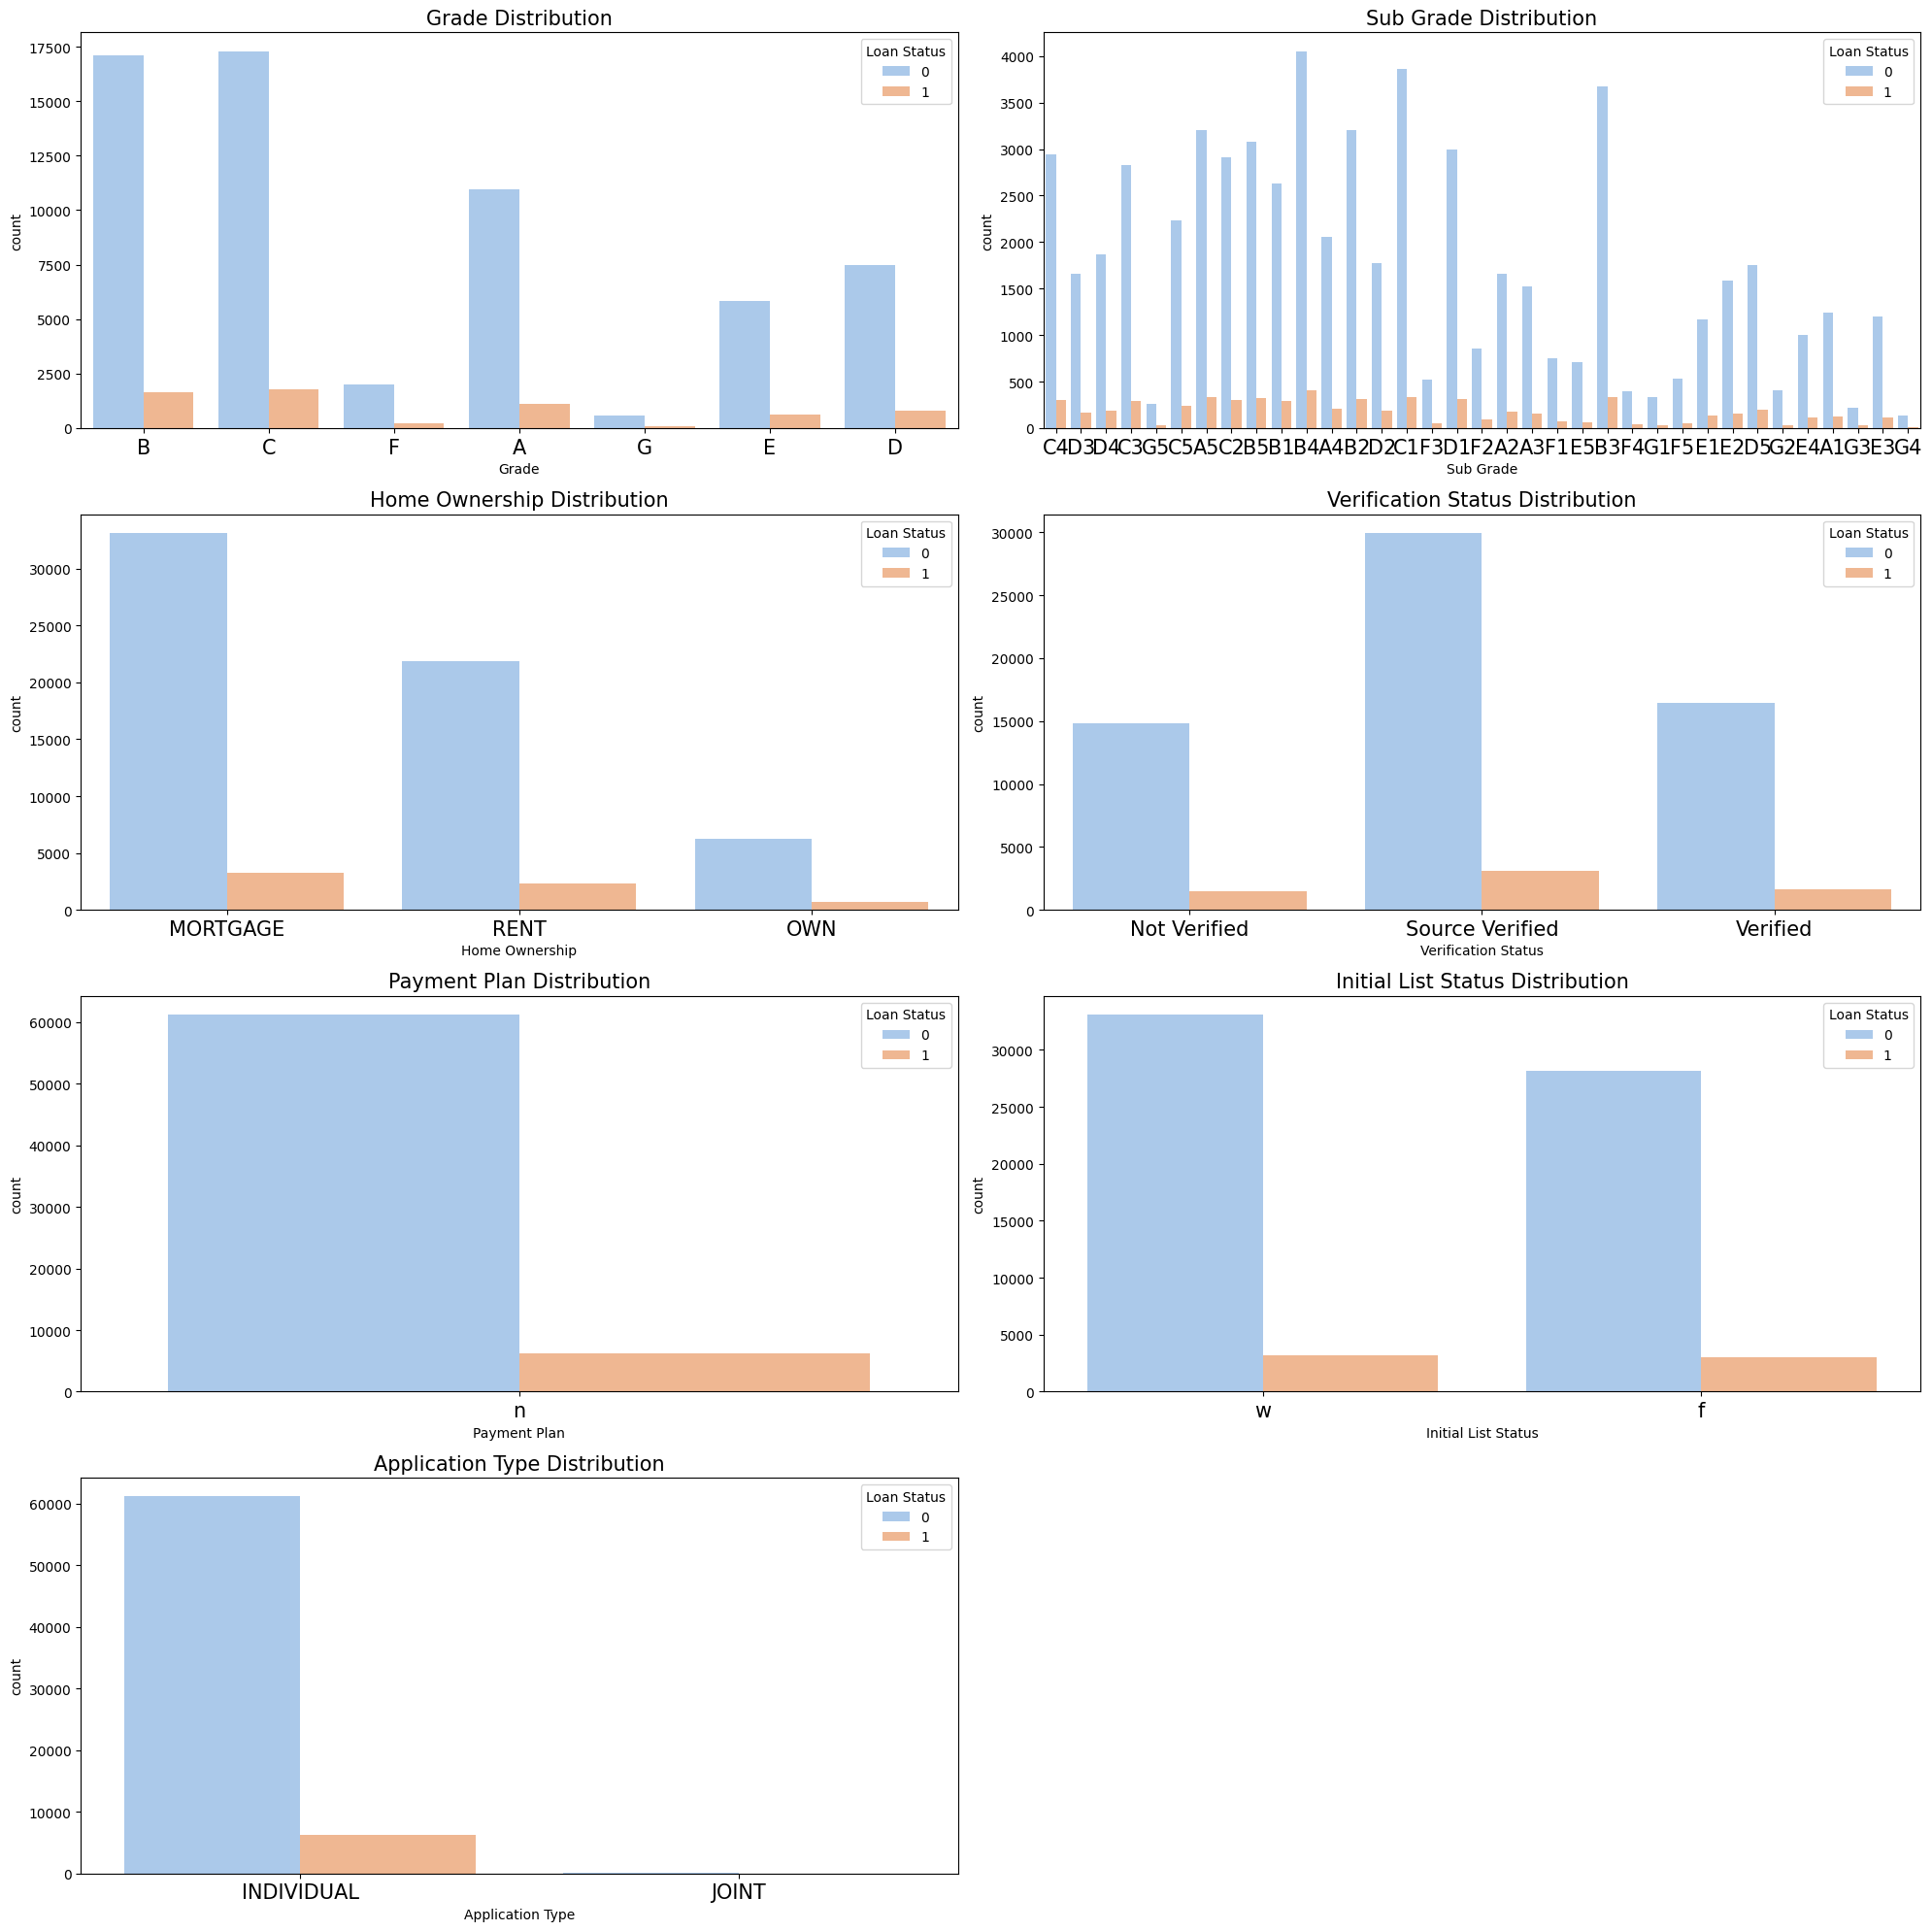

In [17]:
fig=plt.subplots(figsize=(20, 20))
for i,col  in enumerate(['Grade', 'Sub Grade', 'Home Ownership',
       'Verification Status', 'Payment Plan',
       'Initial List Status', 'Application Type']):
       _=plt.subplot(4,2,i+1)
       _=sns.countplot(x=data[col],hue=data['Loan Status'].astype('object'))
       _=plt.title(col+' Distribution',fontsize=15)
       _=plt.xlabel(col,fontsize=10)
       _=plt.xticks(fontsize=15)
       _=plt.tight_layout()
plt.show()

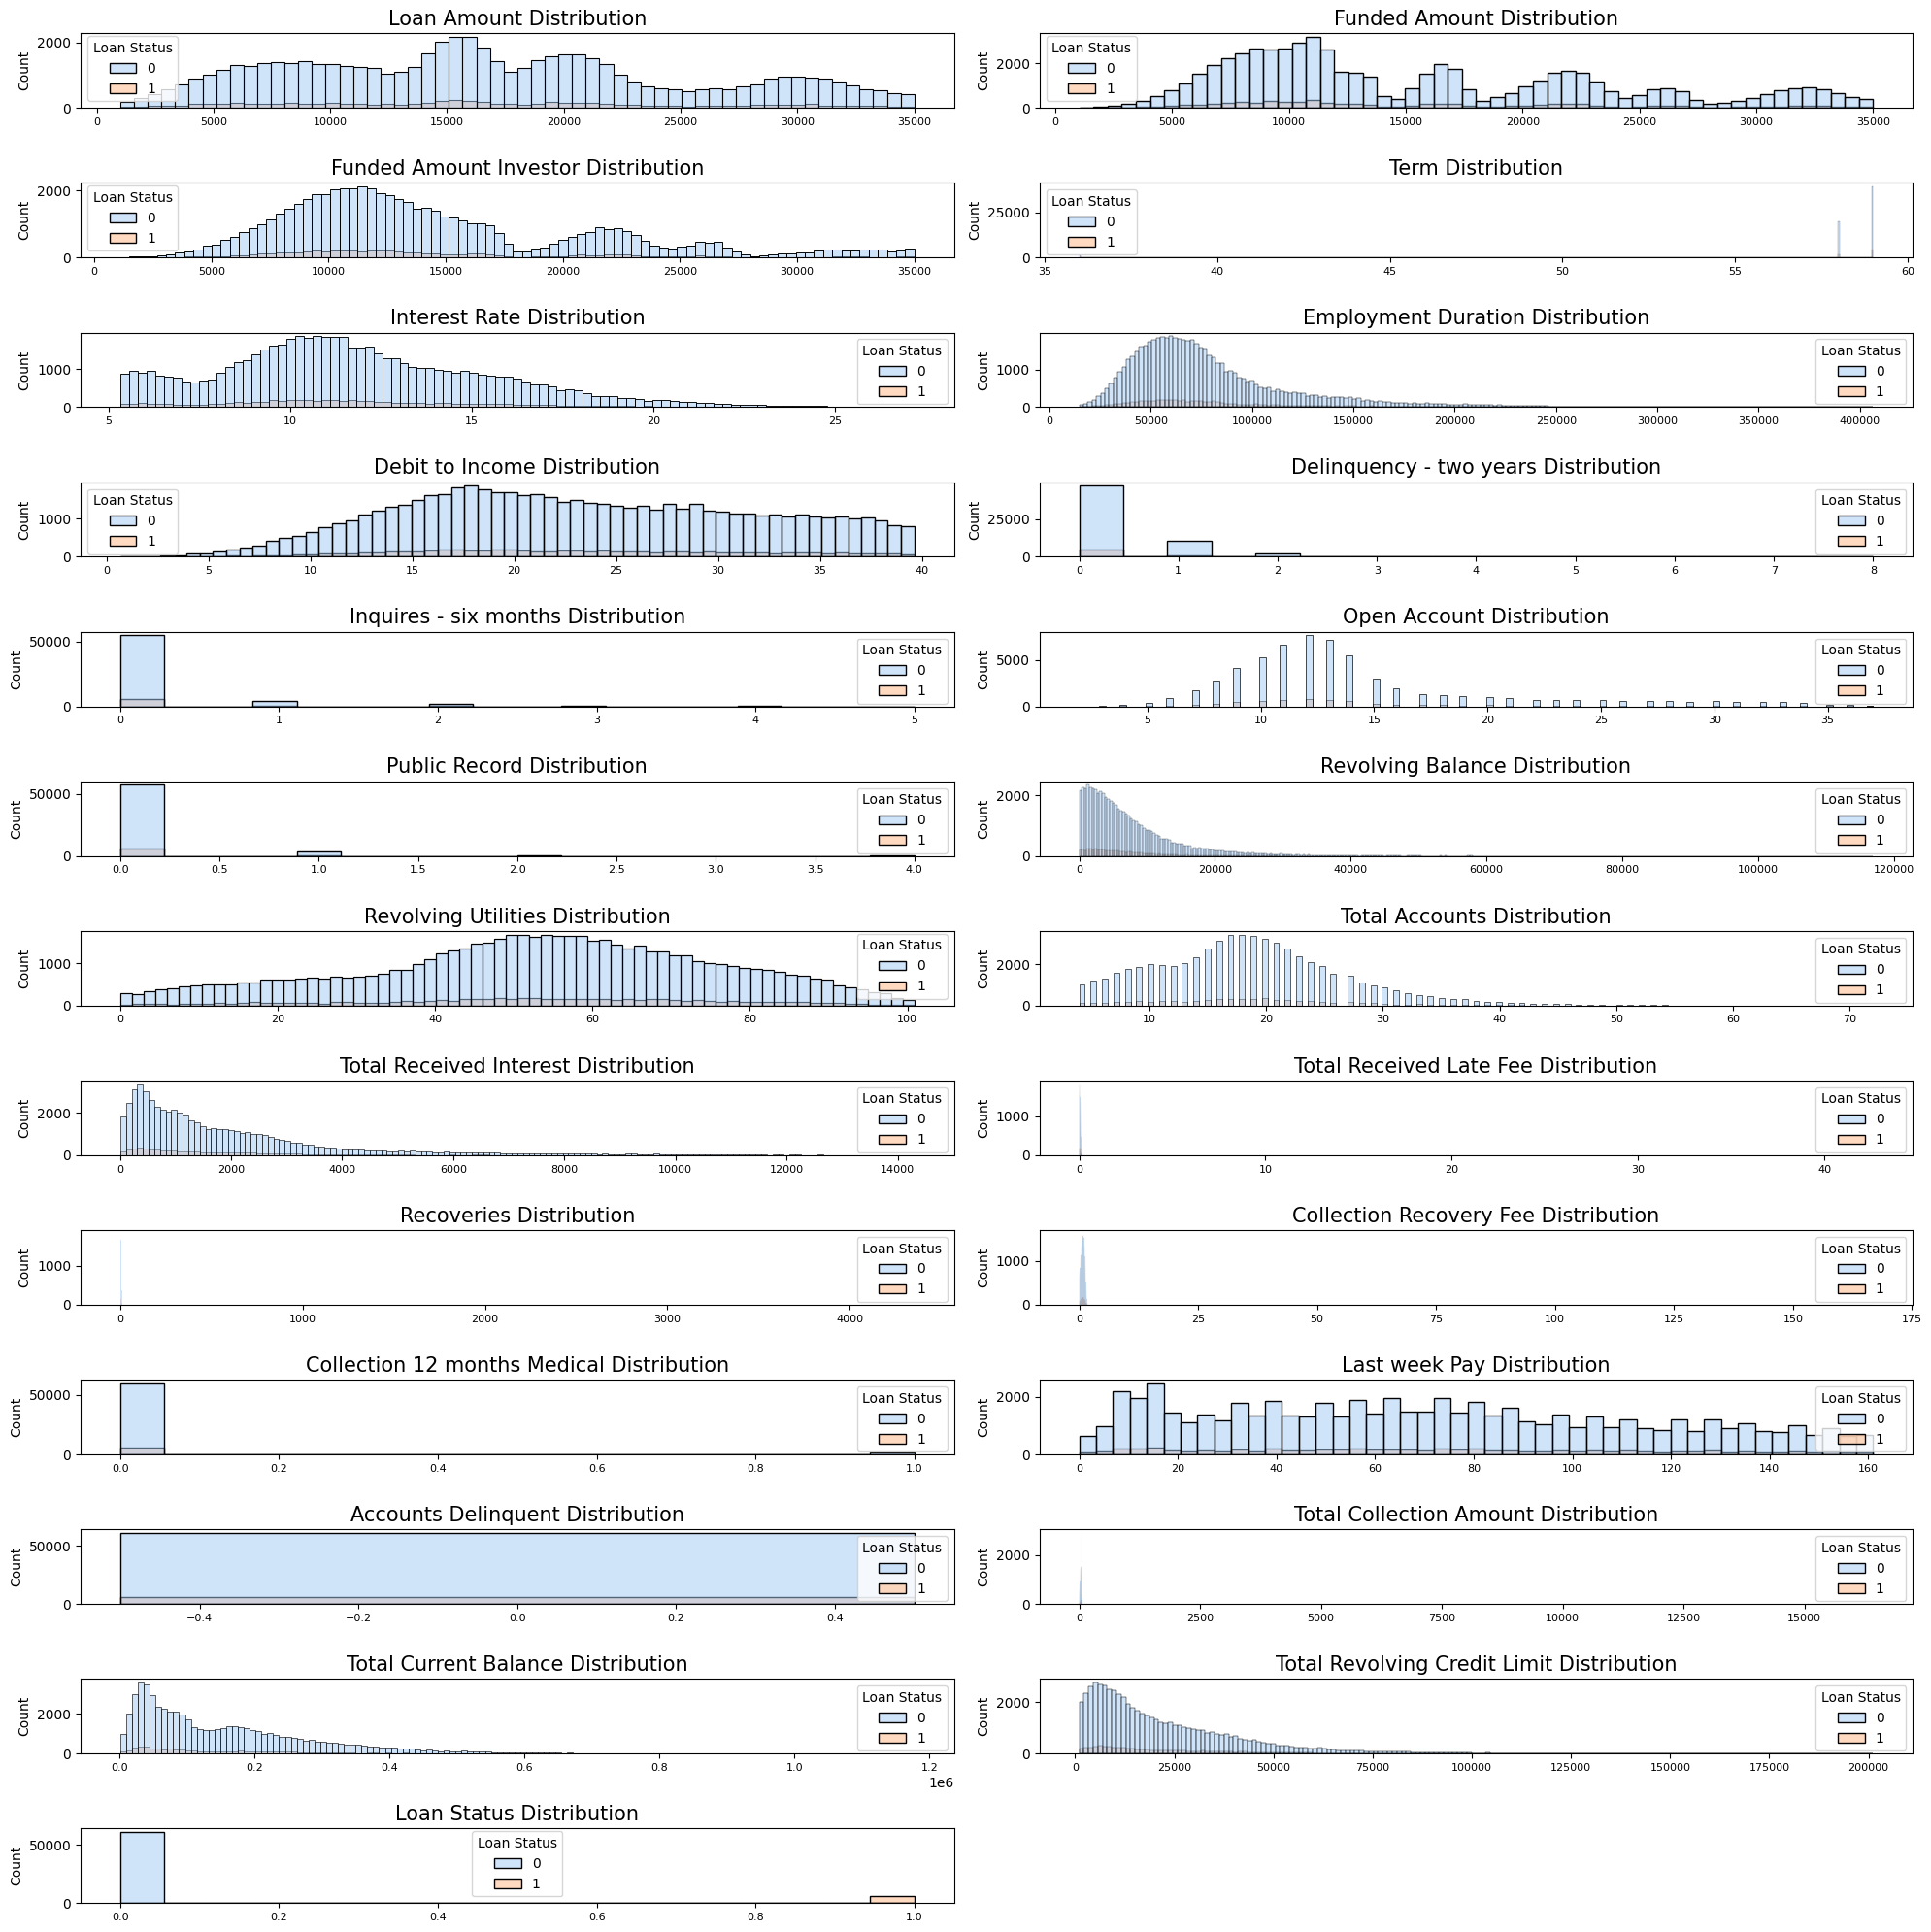

In [18]:
#Let's see the numerical columns distribution using histogram plot.
fig=plt.subplots(figsize=(20, 20))
for i,col in enumerate(data.select_dtypes(exclude="object").columns.values):
  plt.subplot(13,2,i+1)
  _=sns.histplot(data=data,x=col,hue="Loan Status")
  _=plt.title(col+' Distribution',fontsize=15)
  _=plt.xlabel("")
  _=plt.xticks(fontsize=8)
  _=plt.tight_layout()
plt.show()

In [19]:
data['Accounts Delinquent'].value_counts() #The above histogram explains that the column Accounts Delinquent has same value(0- No delinqurnt) for all rows.

0    67463
Name: Accounts Delinquent, dtype: int64

In [20]:
data.drop(columns=['Accounts Delinquent'], inplace=True)


In [21]:
data.shape

(67463, 33)

In [22]:
# Examining the Unique Values in Categorical Features:
# It's essential to understand the number of unique categories in each feature,
# as this can influence how we might want to encode these categorical variables for modeling.



unique_cate_values = data.select_dtypes(include="object").nunique()
print("Number of Unique Values in Each Categorical Feature: \n", unique_cate_values)

Number of Unique Values in Each Categorical Feature: 
 Batch Enrolled          41
Grade                    7
Sub Grade               35
Home Ownership           3
Verification Status      3
Payment Plan             1
Loan Title             109
Initial List Status      2
Application Type         2
dtype: int64


In [23]:
data["Batch Enrolled"] = data["Batch Enrolled"].str.replace(r'\D', '', regex=True).astype(int)



In [24]:
data["Batch Enrolled"].head()

ID
65087372    2522922
1450153     1586599
1969101     2136391
6651430     2428731
14354669    5341619
Name: Batch Enrolled, dtype: int64

In [25]:
print(data.dtypes)

Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Batch Enrolled                    int64
Interest Rate                   float64
Grade                            object
Sub Grade                        object
Home Ownership                   object
Employment Duration             float64
Verification Status              object
Payment Plan                     object
Loan Title                       object
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Public Record                     int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status              object
Total Received Interest         float64
Total Received Late Fee         float64
Recoveries                      float64


In [26]:
#Outliers


#1. Outlier Detection - (Percentile Method)
data.quantile([0.01, 0.02, 0.03, 0.04, 0.05, 0.95, 0.96,
                   0.97, 0.98, 0.99]).style.background_gradient(cmap = 'Set3')

In [27]:
import pandas as pd
import numpy as np

def detect_outliers(data: pd.DataFrame, col_name: str, p=1.5) -> int:
    first_quartile = np.percentile(data[col_name].tolist(), 25)
    third_quartile = np.percentile(data[col_name].tolist(), 75)
    IQR = third_quartile - first_quartile

    upper_limit = third_quartile + (p * IQR)
    lower_limit = first_quartile - (p * IQR)

    return sum((data[col_name] < lower_limit) | (data[col_name] > upper_limit))

def treat_outliers(data: pd.DataFrame, col_name: str):
    lower_limit = data[col_name].quantile(0.05)
    upper_limit = data[col_name].quantile(0.95)
    data.loc[data[col_name] > upper_limit, col_name] = upper_limit
    data.loc[data[col_name] < lower_limit, col_name] = lower_limit


numeric_cols = data.select_dtypes(include=[np.number]).columns

# Calculate count of outliers in each numeric column
outlier_counts_before = {}
for column in numeric_cols:
    count = detect_outliers(data, column)
    outlier_counts_before[column] = count
    treat_outliers(data, column)

# Print count of outliers for each numeric column before treatment
print("Outliers before treatment:")
for column, count in outlier_counts_before.items():
    print(f"Number of outliers in column '{column}': {count}")

# (Optional) Check effectiveness of the treatment by detecting outliers again
outlier_counts_after = {}
for column in numeric_cols:
    count = detect_outliers(data, column)
    outlier_counts_after[column] = count

# Print count of outliers for each numeric column after treatment
print("\nOutliers after treatment:")
for column, count in outlier_counts_after.items():
    print(f"Number of outliers in column '{column}': {count}")


Outliers before treatment:
Number of outliers in column 'Loan Amount': 0
Number of outliers in column 'Funded Amount': 0
Number of outliers in column 'Funded Amount Investor': 3103
Number of outliers in column 'Term': 1457
Number of outliers in column 'Batch Enrolled': 0
Number of outliers in column 'Interest Rate': 851
Number of outliers in column 'Employment Duration': 4115
Number of outliers in column 'Debit to Income': 0
Number of outliers in column 'Delinquency - two years': 15409
Number of outliers in column 'Inquires - six months': 6977
Number of outliers in column 'Open Account': 5614
Number of outliers in column 'Public Record': 4592
Number of outliers in column 'Revolving Balance': 3719
Number of outliers in column 'Revolving Utilities': 0
Number of outliers in column 'Total Accounts': 1424
Number of outliers in column 'Total Received Interest': 4978
Number of outliers in column 'Total Received Late Fee': 3374
Number of outliers in column 'Recoveries': 2302
Number of outliers

In [28]:
from scipy.stats import zscore
import numpy as np
import pandas as pd

def detect_outliers(data: pd.DataFrame, col_name: str) -> int:
    z_scores = zscore(data[col_name])
    abs_z_scores = np.abs(z_scores)
    return len(data[abs_z_scores > 3])

def treat_outliers_zscore(data: pd.DataFrame, col_name: str):
    z_scores = zscore(data[col_name])
    abs_z_scores = np.abs(z_scores)
    data.loc[abs_z_scores > 3, col_name] = data[col_name].median()  # replace with median

# Excluding 'Loan Status' column from the numeric columns list
numeric_cols = [col for col in data.select_dtypes(include=[np.number]).columns if col != 'Loan Status']

# Calculate count of outliers in each numeric column using Z-score method
outlier_counts_before_zscore = {}
for column in numeric_cols:
    count = detect_outliers(data, column)
    outlier_counts_before_zscore[column] = count
    treat_outliers_zscore(data, column)

# Print count of outliers for each numeric column before treatment
print("Outliers before treatment using Z-score:")
for column, count in outlier_counts_before_zscore.items():
    print(f"Number of outliers in column '{column}': {count}")

# (Optional) Check effectiveness of the treatment by detecting outliers again
outlier_counts_after_zscore = {}
for column in numeric_cols:
    count = detect_outliers(data, column)
    outlier_counts_after_zscore[column] = count

# Print count of outliers for each numeric column after treatment
print("\nOutliers after treatment using Z-score:")
for column, count in outlier_counts_after_zscore.items():
    print(f"Number of outliers in column '{column}': {count}")


Outliers before treatment using Z-score:
Number of outliers in column 'Loan Amount': 0
Number of outliers in column 'Funded Amount': 0
Number of outliers in column 'Funded Amount Investor': 0
Number of outliers in column 'Term': 0
Number of outliers in column 'Batch Enrolled': 0
Number of outliers in column 'Interest Rate': 0
Number of outliers in column 'Employment Duration': 0
Number of outliers in column 'Debit to Income': 0
Number of outliers in column 'Delinquency - two years': 3673
Number of outliers in column 'Inquires - six months': 0
Number of outliers in column 'Open Account': 0
Number of outliers in column 'Public Record': 4592
Number of outliers in column 'Revolving Balance': 0
Number of outliers in column 'Revolving Utilities': 0
Number of outliers in column 'Total Accounts': 0
Number of outliers in column 'Total Received Interest': 0
Number of outliers in column 'Total Received Late Fee': 0
Number of outliers in column 'Recoveries': 0
Number of outliers in column 'Collect

In [29]:

NewShape = data.shape
print('Original Shape VS Shape after cleaning:')
print(OriginalShape, NewShape)
print('\nLost data through cleaning:')
print(np.round((1-NewShape[0]/OriginalShape[0])*100,2),'%')

Original Shape VS Shape after cleaning:
(67463, 34) (67463, 33)

Lost data through cleaning:
0.0 %


In [30]:
# Convert annual interest rate to monthly and then to a fraction
data['Interest Rate'] = data['Interest Rate'] / 1200

# Compute monthly EMI
P = data['Funded Amount Investor']
r = data['Interest Rate']
n = data['Term']

EMI = P * r * (1 + r)**n / ((1 + r)**n - 1)

# Calculate monthly income
data['monthly_income'] = EMI / data['Debit to Income']



In [31]:
# Loan Amount to Funded Amount Ratio: This will indicate the proportion of the requested loan that was funded. It might give insights into the trustworthiness of a representative.

data['Loan_to_Funded'] = data['Funded Amount'] / data['Loan Amount']


In [32]:
#Interest Rate by Term: The impact of interest over different terms can be different.

data['Interest_by_Term'] = data['Interest Rate'] * data['Term']


In [33]:
#3 Utilized Credit Ratio: How much of the available credit is being utilized.

data['Utilized_Credit_Ratio'] = data['Revolving Balance'] / data['Total Revolving Credit Limit']



In [34]:
# feature engineering task.

def pre_process(data):
    # drop the loan title and payment plan column
    if 'Loan Title' in data.columns:
        data = data.drop(columns=['Loan Title'])
    if 'Payment Plan' in data.columns:
        data = data.drop(columns=['Payment Plan'])

    # Interest per month
    data['Interest_per_mon'] = ((data['Loan Amount'] * data['Interest Rate'])/100) / data['Term']

    # total interest amount
    data['total_intr_amt'] = data['Interest_per_mon'] * data['Term']

    # Check investor funded amount greater than funded amount
    data['Fund_amnt_grt'] = (data['Funded Amount Investor'] > data['Funded Amount']).astype('int')

    # total revolve amount
    data['total_revolve'] = data['Revolving Balance'] + data['Revolving Utilities']

    # total received amount
    data['total_received'] = data['Total Received Interest'] + data['Total Collection Amount']

    # total recovery amount
    data['total_recovery'] = data['Recoveries'] + data['Collection Recovery Fee']

    # check total revolve amount less than total revolving credit limit
    data['revolve_amnt_grt'] = (data['total_revolve'] < data['Total Revolving Credit Limit']).astype('int')

    # check Loan amount greater than total current balance
    data['loan_grt_balance'] = (data['Loan Amount'] > data['Total Current Balance']).astype('int')

    # representative's customer count.
    if 'Batch Enrolled' in data.columns:
        data['reprs_cust_count'] = data.groupby(['Batch Enrolled'])['Batch Enrolled'].transform('count')

    return data

data = pre_process(data)


In [35]:
# Print column indices and names
for c, i in enumerate(data.columns.values):
    print(f"{c}_{i}")

0_Loan Amount
1_Funded Amount
2_Funded Amount Investor
3_Term
4_Batch Enrolled
5_Interest Rate
6_Grade
7_Sub Grade
8_Home Ownership
9_Employment Duration
10_Verification Status
11_Debit to Income
12_Delinquency - two years
13_Inquires - six months
14_Open Account
15_Public Record
16_Revolving Balance
17_Revolving Utilities
18_Total Accounts
19_Initial List Status
20_Total Received Interest
21_Total Received Late Fee
22_Recoveries
23_Collection Recovery Fee
24_Collection 12 months Medical
25_Application Type
26_Last week Pay
27_Total Collection Amount
28_Total Current Balance
29_Total Revolving Credit Limit
30_Loan Status
31_monthly_income
32_Loan_to_Funded
33_Interest_by_Term
34_Utilized_Credit_Ratio
35_Interest_per_mon
36_total_intr_amt
37_Fund_amnt_grt
38_total_revolve
39_total_received
40_total_recovery
41_revolve_amnt_grt
42_loan_grt_balance
43_reprs_cust_count


In [36]:

#EDA

Text(0, 0.5, 'Percentage')

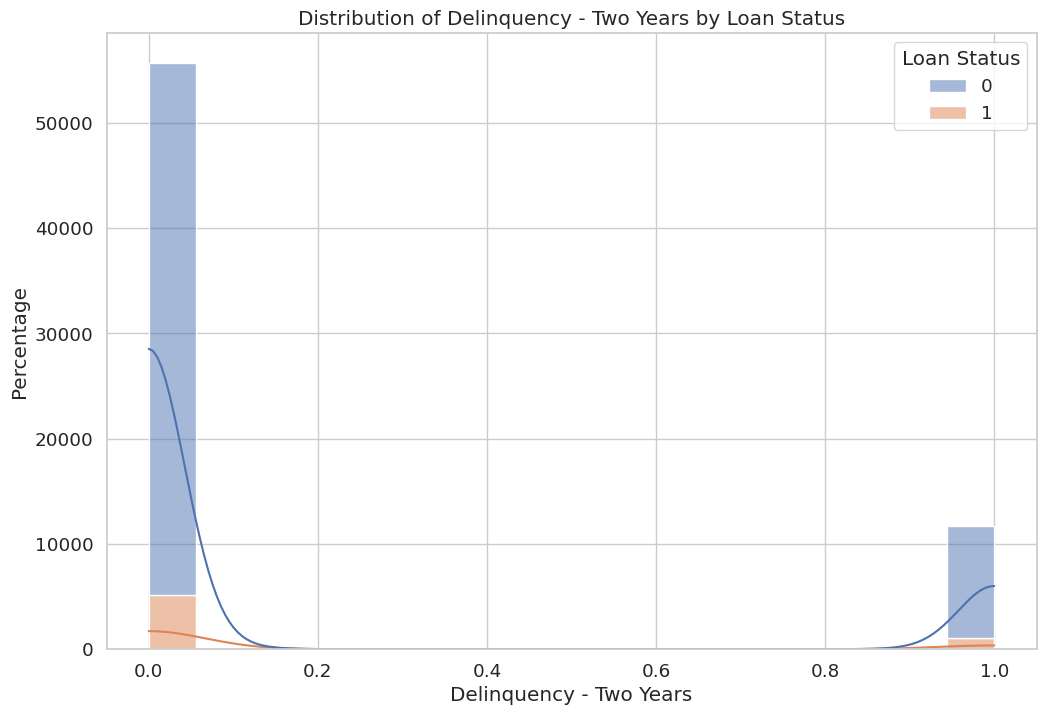

In [37]:
# Set up the figure
sns.set(style="whitegrid", font_scale=1.2)
fig, ax = plt.subplots(figsize=(12, 8))

# Create the visualization
sns.histplot(data=data, x="Delinquency - two years", hue="Loan Status", multiple="stack", kde=True, ax=ax)


# Add a title and axis labels
plt.title("Distribution of Delinquency - Two Years by Loan Status")
plt.xlabel("Delinquency - Two Years")
plt.ylabel("Percentage")

Text(0, 0.5, 'Percentage')

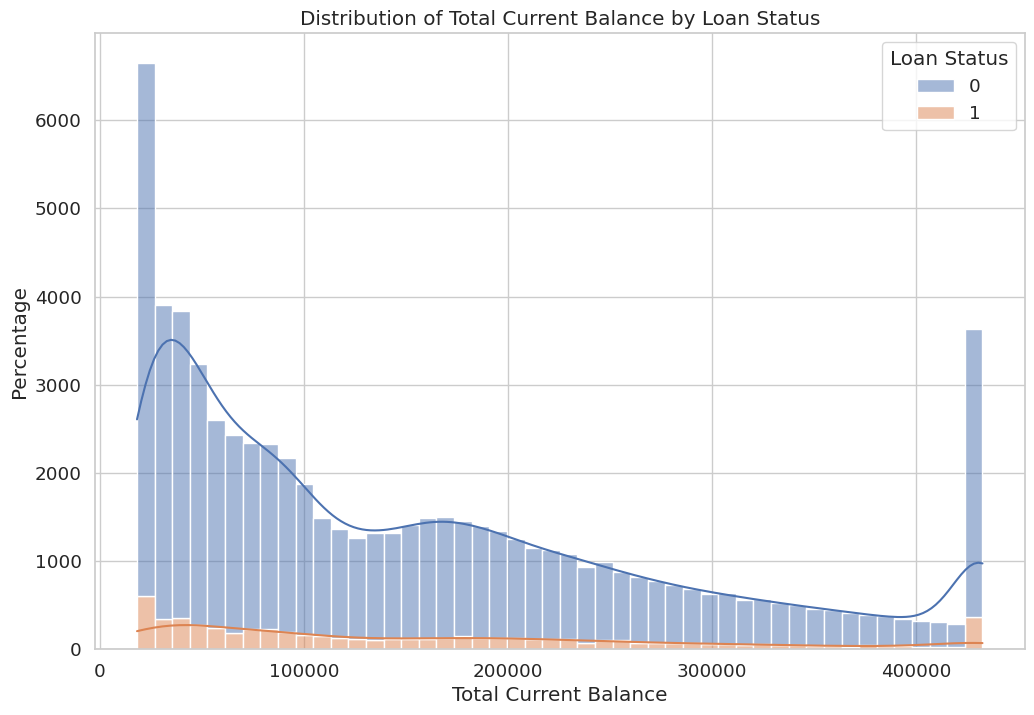

In [38]:
# Set up the figure
sns.set(style="whitegrid", font_scale=1.2)
fig, ax = plt.subplots(figsize=(12, 8))

# Create the visualization
sns.histplot(data=data, x="Total Current Balance", hue="Loan Status", multiple="stack", kde=True, ax=ax)



# Add a title and axis labels
plt.title("Distribution of Total Current Balance by Loan Status")
plt.xlabel("Total Current Balance")
plt.ylabel("Percentage")

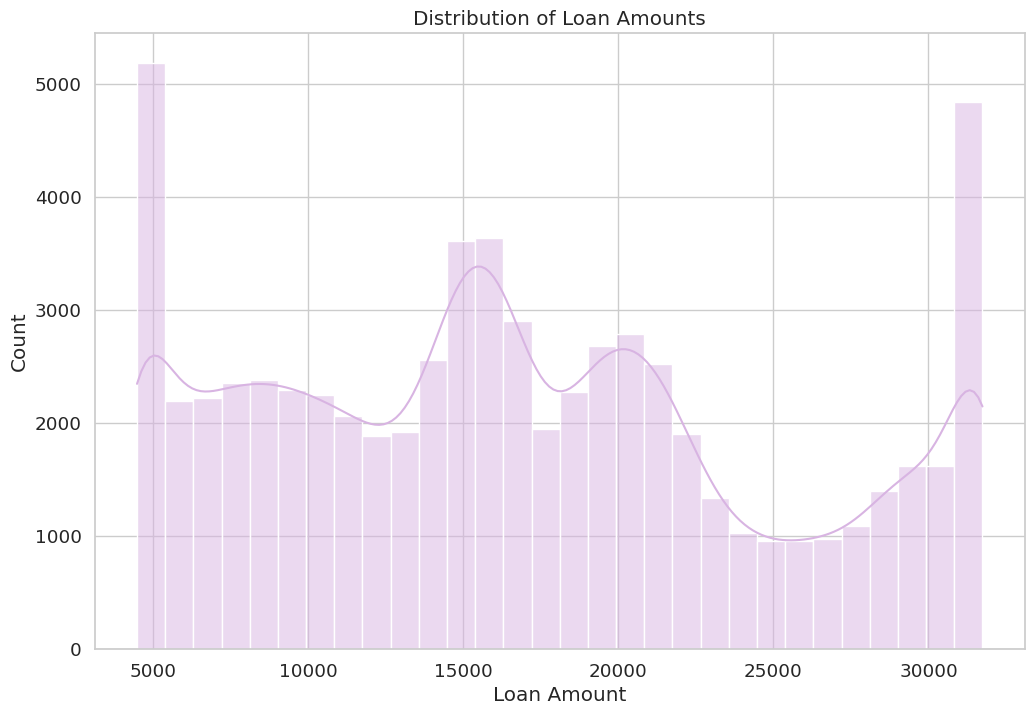

In [39]:
sns.set(style="whitegrid", font_scale=1.2)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

# Create the visualization with pastel color
sns.histplot(data=data, x='Loan Amount', kde=True, bins=30, color='#D8B4E2')

# Set the axis labels
ax.set_xlabel('Loan Amount')
ax.set_ylabel('Count')
ax.set_title('Distribution of Loan Amounts')

plt.show()

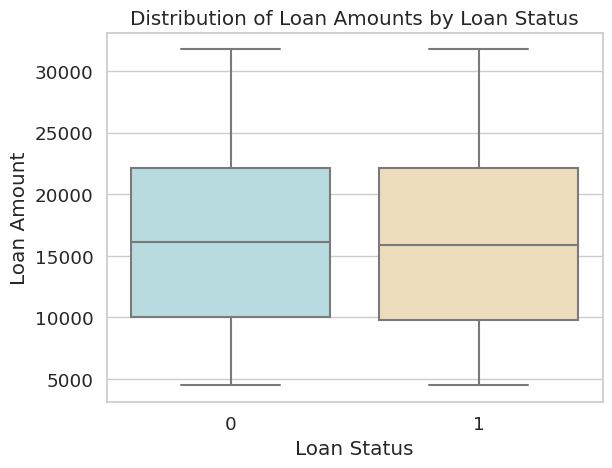

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", font_scale=1.2)

# Create the visualization with custom pastel colors for each box
sns.boxplot(x='Loan Status', y='Loan Amount', data=data,
            palette=['#B0E0E6', '#F5DEB3'])

# Set the axis labels
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('Distribution of Loan Amounts by Loan Status')

plt.show()


# Correlation of Numeric Features

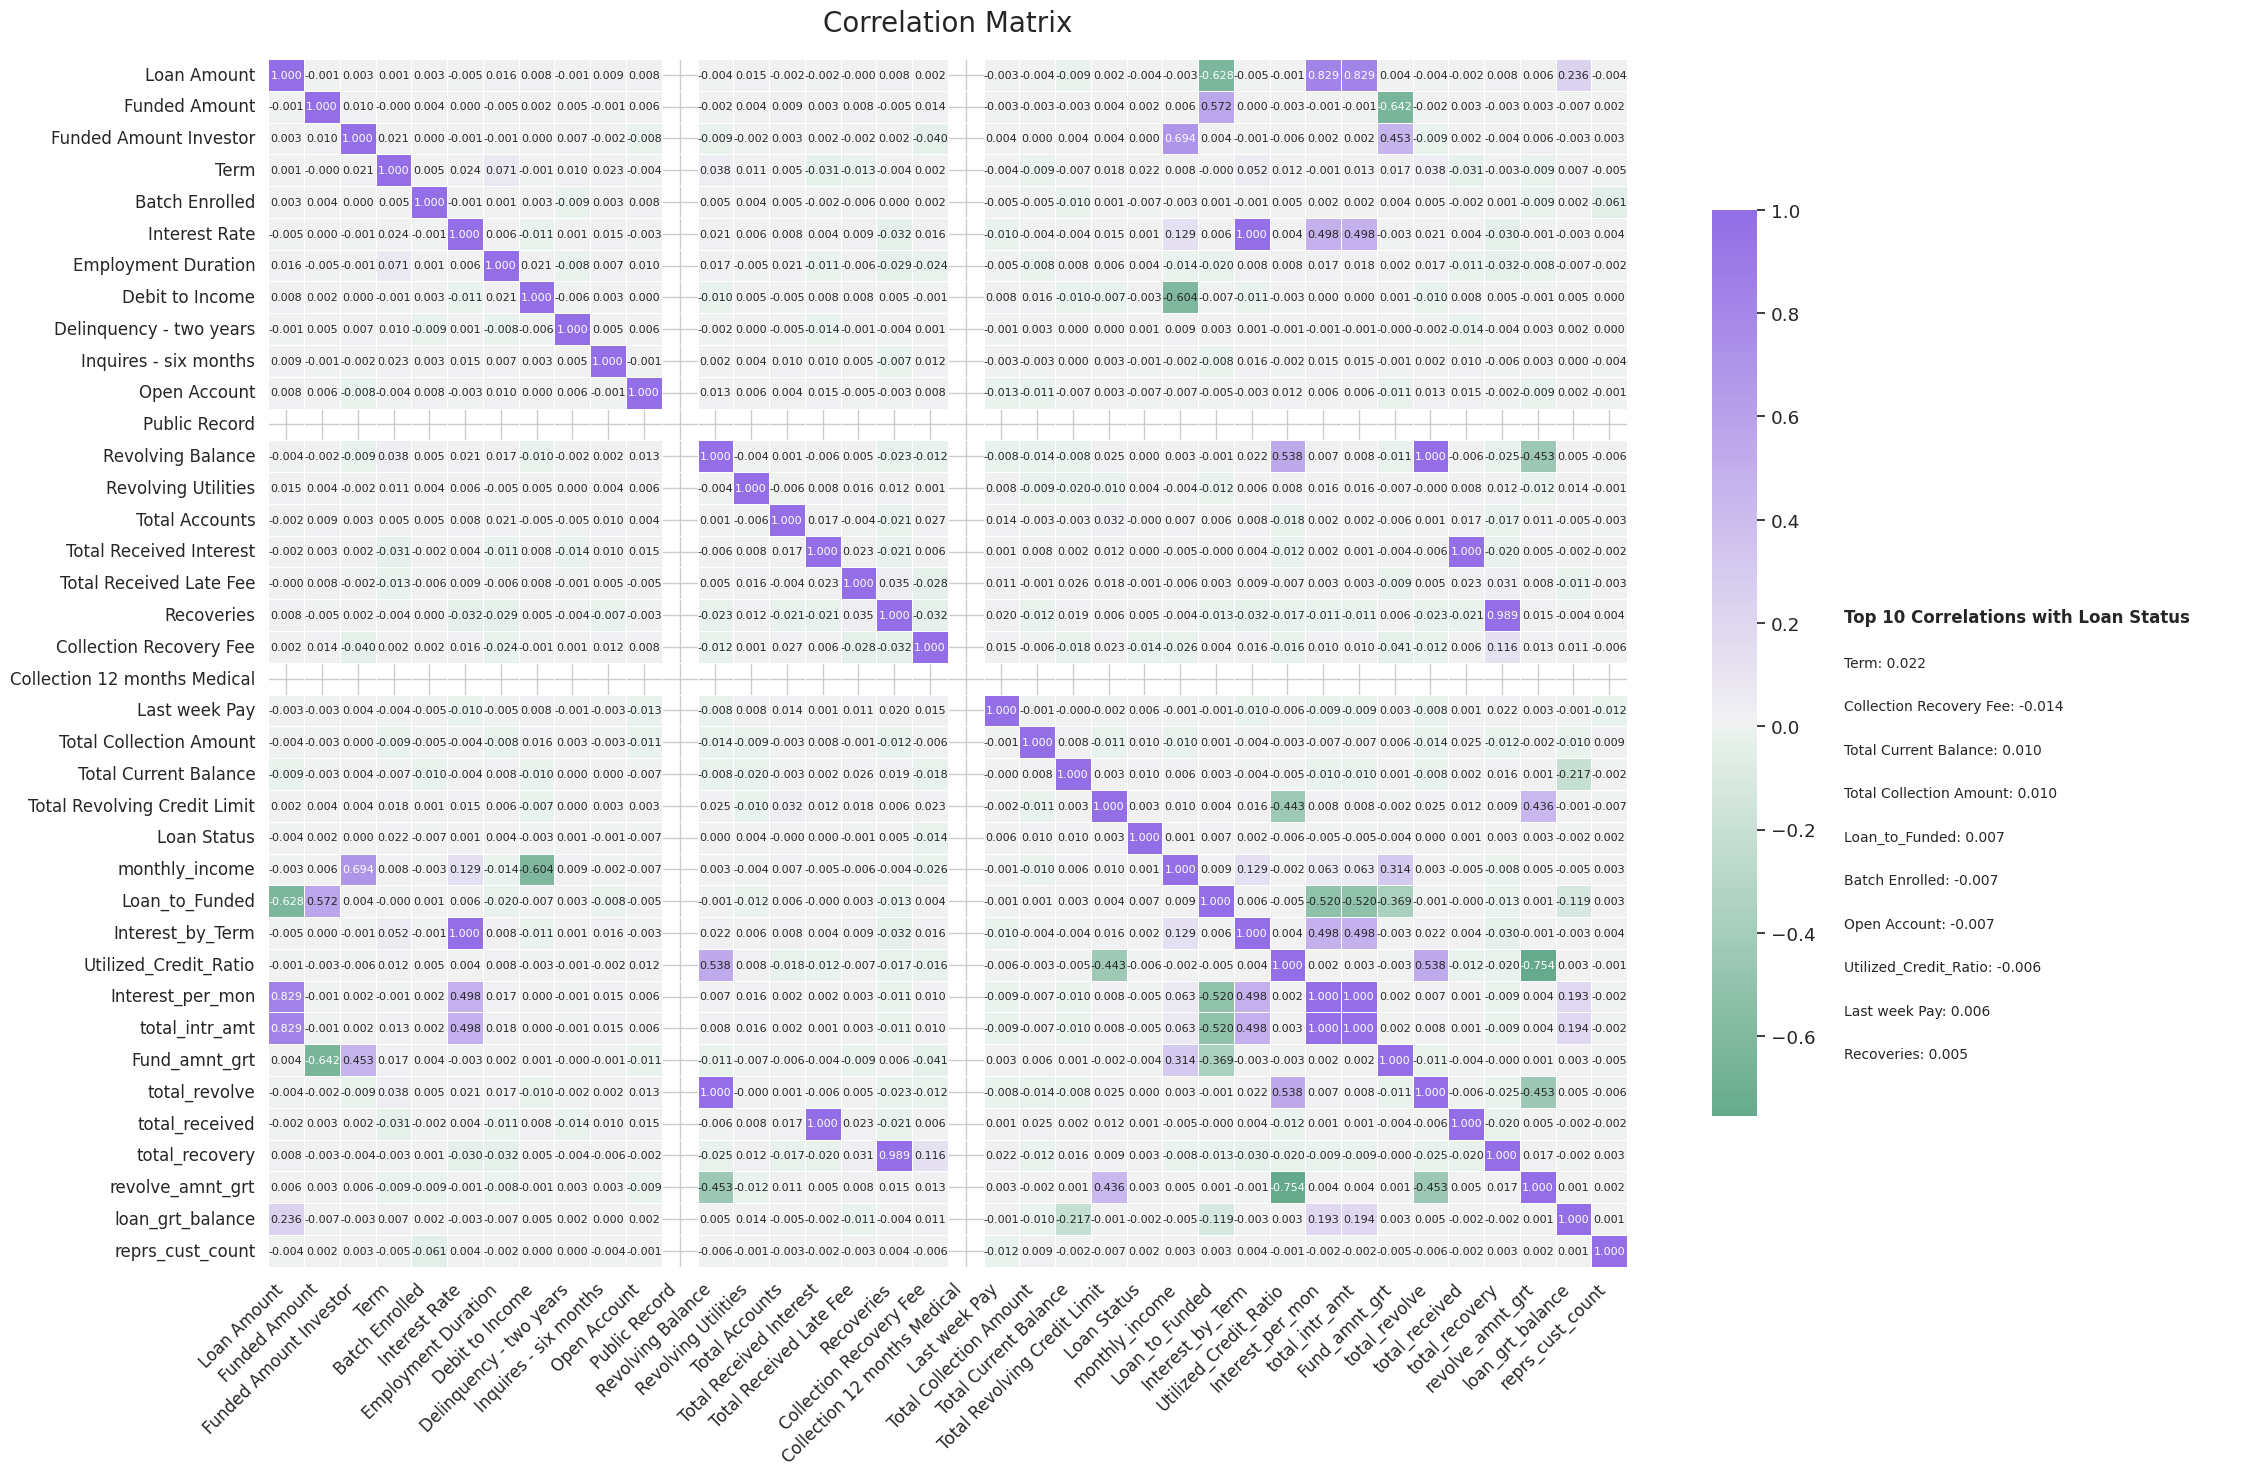

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Generate the correlation matrix
correlation_matrix = data.select_dtypes(exclude="object").corr()

# Get correlations with only the target variable 'Loan Status'
target_correlations = correlation_matrix['Loan Status'].drop('Loan Status').sort_values(key=abs, ascending=False)

# Select top 10 correlations
top_10_correlations = target_correlations.head(10)

# Plot
fig, ax = plt.subplots(figsize=(20, 15))

# Create a sea-green centered diverging color palette
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)

# Plot only the 'Loan Status' correlation column
sns.heatmap(correlation_matrix, cmap=cmap, center=0, annot=True, fmt=".3f", annot_kws={"size": 8}, linewidths=0.5, cbar_kws={"shrink": 0.75}, ax=ax)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Correlation Matrix', fontsize=20, pad=20)

# Create an inset axis on the right side of the heatmap axis
axins = inset_axes(ax, width="30%", height="40%", loc='lower right', bbox_to_anchor=(0.5, 0.1, 1, 1), bbox_transform=ax.transAxes, borderpad=3)
axins.axis('off')

# Add the label for the top 10 correlations
axins.text(0, 1, 'Top 10 Correlations with Loan Status', fontsize=12, weight='bold', verticalalignment='top')

# Display top 10 correlations with the target in the inset
for i, (var, value) in enumerate(top_10_correlations.items()):
    axins.text(0, 0.9 - i*0.09, f"{var}: {value:.3f}", fontsize=10, verticalalignment='top')


plt.tight_layout()
plt.show()


In [42]:
import pandas as pd
from scipy.stats import pointbiserialr


numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop('Loan Status')  # remove target if it's numerical

for col in numeric_columns:
    correlation, p_value = pointbiserialr(data[col], data['Loan Status'])
    print(f"Feature: {col}")
    print(f"Point-Biserial Correlation: {correlation}")
    print(f"P-Value: {p_value}")
    print("------------------------")


Feature: Loan Amount
Point-Biserial Correlation: -0.004415740181381538
P-Value: 0.25141765408946914
------------------------
Feature: Funded Amount
Point-Biserial Correlation: 0.0015380107930740424
P-Value: 0.6895467562407965
------------------------
Feature: Funded Amount Investor
Point-Biserial Correlation: 0.00011755381382472208
P-Value: 0.9756424225803162
------------------------
Feature: Term
Point-Biserial Correlation: 0.02153465225353586
P-Value: 2.2205284273500884e-08
------------------------
Feature: Batch Enrolled
Point-Biserial Correlation: -0.0069486366119389485
P-Value: 0.07110563423930459
------------------------
Feature: Interest Rate
Point-Biserial Correlation: 0.0010749793820945491
P-Value: 0.7800865956927657
------------------------
Feature: Employment Duration
Point-Biserial Correlation: 0.00437668452787784
P-Value: 0.25563499754442426
------------------------
Feature: Debit to Income
Point-Biserial Correlation: -0.003043299011101714
P-Value: 0.4292692570507486
-----

In [43]:
# Feature Importance

import pandas as pd
from scipy.stats import ttest_ind

# Filtering for numeric columns (both int and float)
cols_to_test = data.select_dtypes(include=["int64", "float64"]).columns

# Loop through the numeric columns to perform t-test against "Loan Status"
for col in cols_to_test:
    if col != "Loan Status":  # Ensure we don't test "Loan Status" against itself
        group1 = data[col][data["Loan Status"] == 0].dropna()
        group2 = data[col][data["Loan Status"] == 1].dropna()

        t_stat, p_val = ttest_ind(group1, group2, equal_var=False)  # Assuming unequal variances

        print("=="*40)
        print(f"Column: {col}")
        print(f"T-statistic: {t_stat}")
        print(f"P-value: {p_val}")

Column: Loan Amount
T-statistic: 1.1359027839283613
P-value: 0.25603337199905607
Column: Funded Amount
T-statistic: -0.4008593314842388
P-value: 0.6885349904713634
Column: Funded Amount Investor
T-statistic: -0.030164026904963982
P-value: 0.9759370374055204
Column: Term
T-statistic: -5.714022533350448
P-value: 1.1448110457077375e-08
Column: Batch Enrolled
T-statistic: 1.8006924959578539
P-value: 0.0717911949277223
Column: Interest Rate
T-statistic: -0.27757273182153425
P-value: 0.7813479673394021
Column: Employment Duration
T-statistic: -1.1254584470269047
P-value: 0.2604306600106354
Column: Debit to Income
T-statistic: 0.796831396442173
P-value: 0.42557386044599066
Column: Delinquency - two years
T-statistic: -0.22047044399745208
P-value: 0.8255107401784834
Column: Inquires - six months
T-statistic: 0.1505094232133077
P-value: 0.8803667236072263
Column: Open Account
T-statistic: 1.7356726133882103
P-value: 0.08266246575549593
Column: Public Record
T-statistic: nan
P-value: nan
Column:

In [44]:

# Filtering for categorical columns
cols_to_test = data.select_dtypes(include=["object"]).columns

# Loop through the categorical columns to perform chi-squared test against "Loan Status"
for col in cols_to_test:
    if col != "Loan Status":  # Ensure we don't test "Loan Status" against itself
        contingency = pd.crosstab(data[col], data["Loan Status"])

        chi2, p_val, _, _ = chi2_contingency(contingency)

        print("=="*40)
        print(f"Column: {col}")
        print(f"Chi2 value: {chi2}")
        print(f"P-value: {p_val}")


Column: Grade
Chi2 value: 14.024785837884542
P-value: 0.0293605144624493
Column: Sub Grade
Chi2 value: 33.22818832002119
P-value: 0.5052675609219769
Column: Home Ownership
Chi2 value: 16.101583241640988
P-value: 0.000318849414713897
Column: Verification Status
Chi2 value: 0.6606479264176166
P-value: 0.718690866314581
Column: Initial List Status
Chi2 value: 12.101443058821943
P-value: 0.0005038281525924869
Column: Application Type
Chi2 value: 0.0
P-value: 1.0


In [45]:
#Variables with less than 0.05 P-value based on T-test and Chi Square test

#Term
#Collection Recovery Fee
#Total Collection Amount
#Total Current Balance
#Grade
#Home Ownership
#Initial List Status

In [46]:
#Data Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Employment Duration'] = le.fit_transform(data['Employment Duration'])
data['Verification Status'] = le.fit_transform(data['Verification Status'])
data['Initial List Status'] = le.fit_transform(data['Initial List Status'])
data['Application Type'] = le.fit_transform(data['Application Type'])
data['Grade'] = le.fit_transform(data['Grade'])
data['Sub Grade'] = le.fit_transform(data['Sub Grade'])
data['Home Ownership'] = le.fit_transform(data['Home Ownership'])


In [47]:
#Data Balance

loan_status_counts = data['Loan Status'].value_counts()
# Calculate percentage for each class
loan_status_percentage = data['Loan Status'].value_counts(normalize=True) * 100

print("Counts for each class:")
print(loan_status_counts)
print("\nPercentage for each class:")
print(loan_status_percentage)

Counts for each class:
0    61222
1     6241
Name: Loan Status, dtype: int64

Percentage for each class:
0    90.749003
1     9.250997
Name: Loan Status, dtype: float64


In [48]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Select the features and target
X = data[['Term', 'Public Record', 'Collection Recovery Fee', 'Total Collection Amount',
          'Total Current Balance', 'Grade', 'Home Ownership', 'Initial List Status']]
y = data['Loan Status']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Fit the logistic regression model on the balanced data
clf = LogisticRegression(max_iter=5000).fit(X_train_smote, y_train_smote)

# Predict on test set
y_pred = clf.predict(X_test)

# Get the coefficients
coef = clf.coef_

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Coefficients:", coef)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion)


Coefficients: [[-7.12859529e-04  0.00000000e+00 -2.09248618e-05 -1.25528281e-04
   2.71086478e-07 -2.52811055e-04 -1.78707485e-04 -1.98439592e-04]]
Accuracy: 0.6080042350449973
Precision: 0.09668791258820851
Recall: 0.3916551406177962
F1 Score: 0.1550890004564126
Confusion Matrix:
 [[27014 15873]
 [ 2639  1699]]


In [49]:
import pandas as pd



# Save the DataFrame to a new CSV file
data.to_csv('updated_data.csv', index=False)



In [50]:
data.shape

(67463, 44)

In [51]:
#Feature Importance

In [52]:
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

X = data.drop('Loan Status',1)
y = data['Loan Status']

X = np.array(X)
y = np.array(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handle class imbalance using SMOTE on the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Create and fit the random forest classifier using the balanced training data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_smote, y_train_smote)

# Get feature importances
importances = clf.feature_importances_

# Get the index of importances from greatest importance to least
sorted_indices = np.argsort(importances)[::-1]

# Pairing feature names with their importance scores
features = list(data.drop('Loan Status', 1).columns)
feature_importances = [(feature, importance) for feature, importance in zip(features, importances)]
sorted_feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)



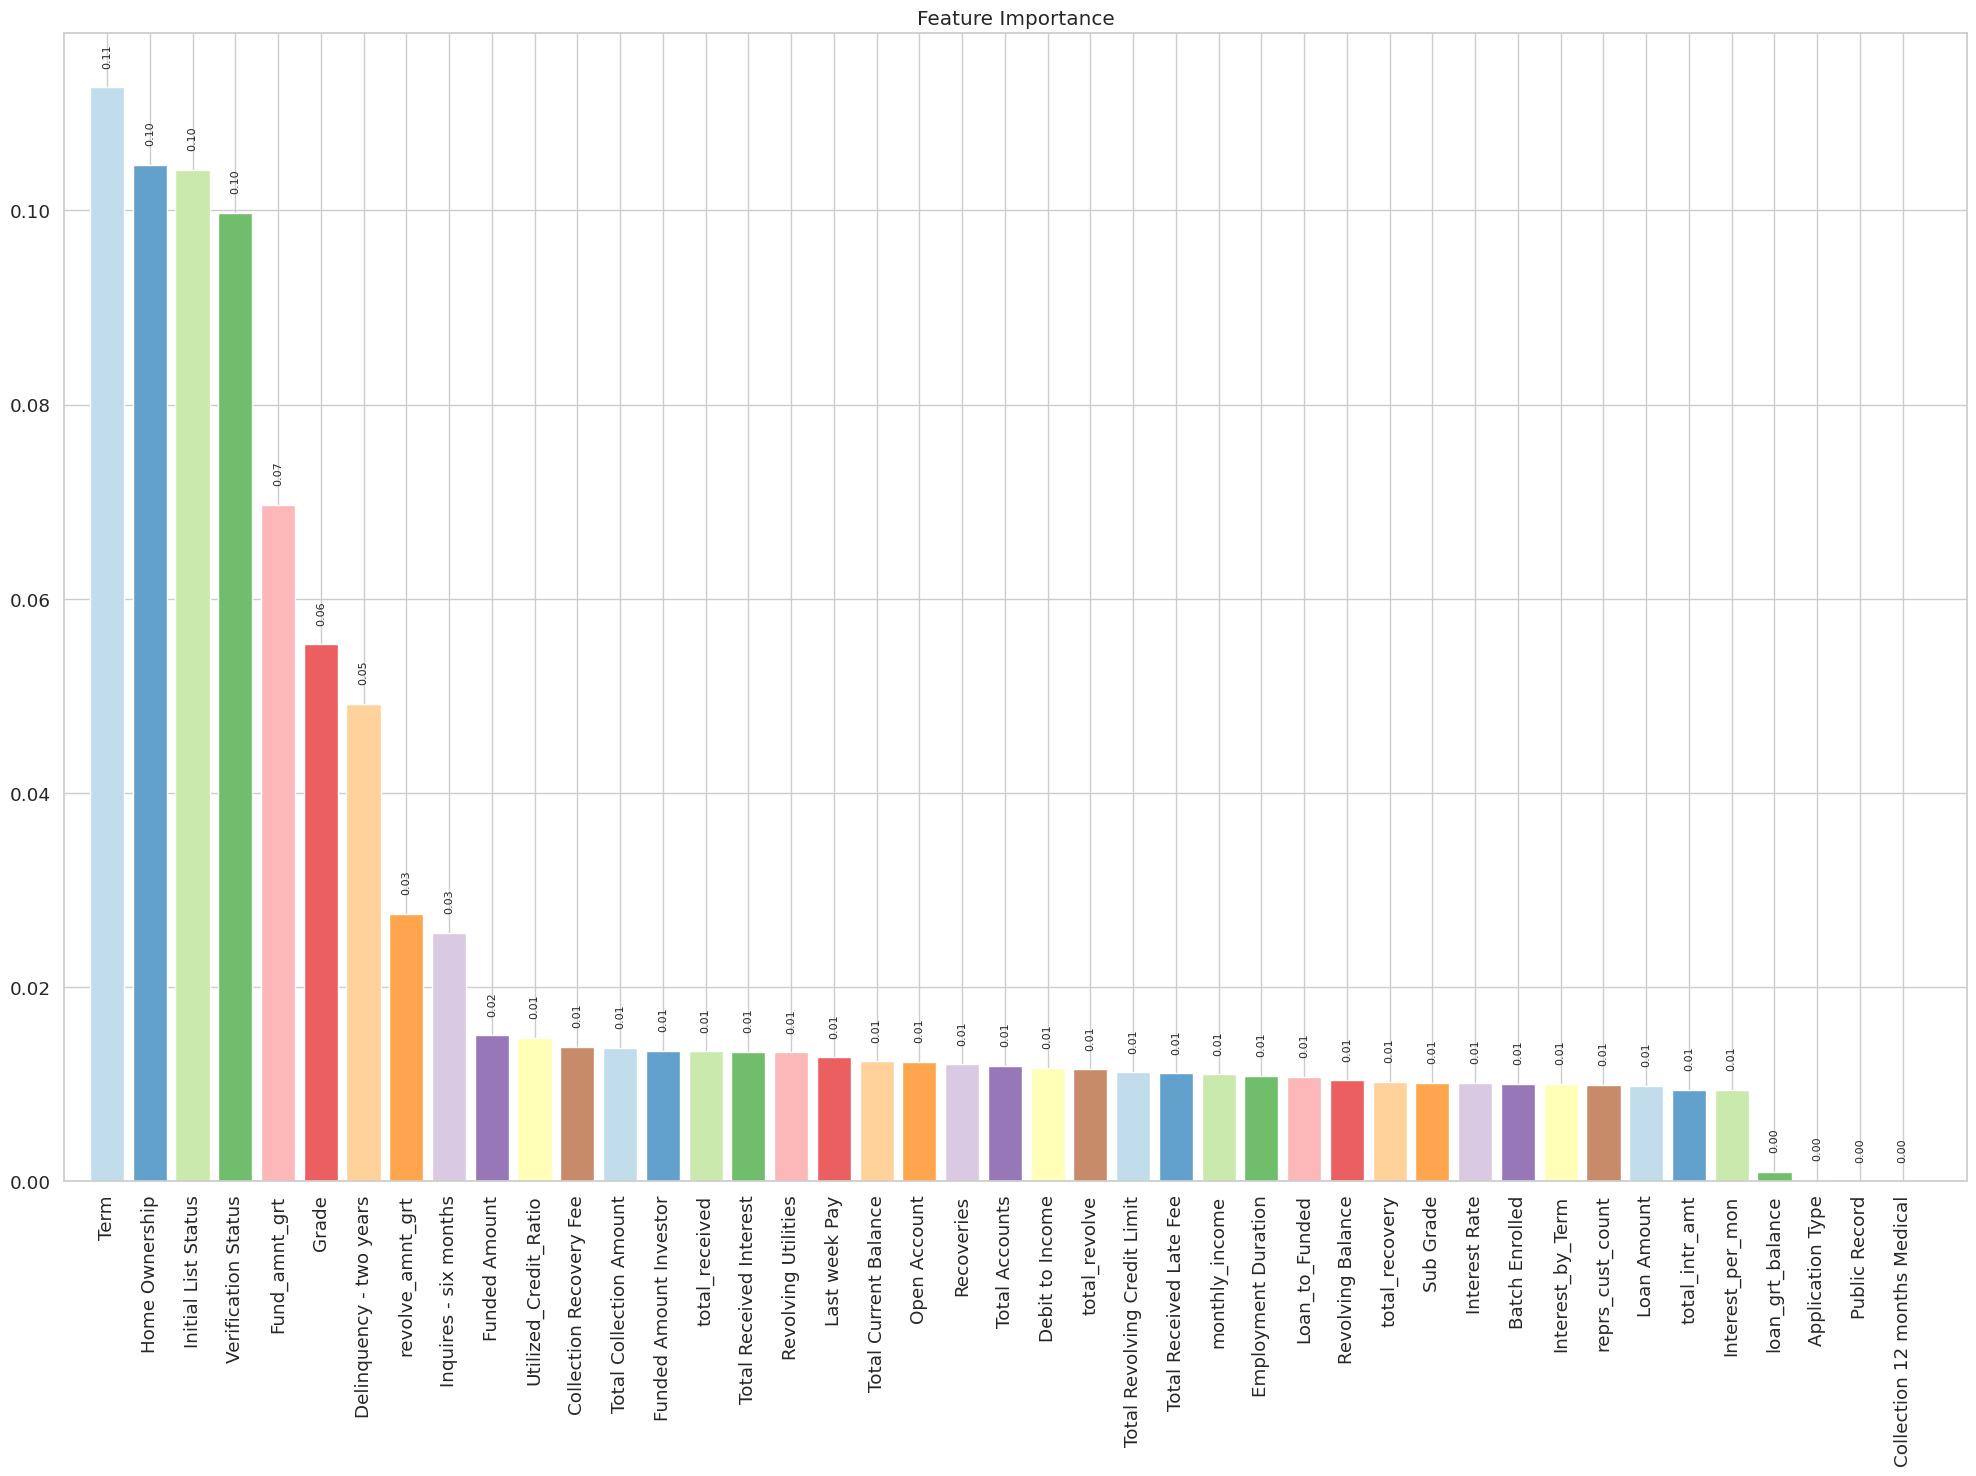

In [53]:
from matplotlib.colors import to_rgb

def blend_colors(color1, color2, weight=0.5):
    return [c1*weight + c2*(1-weight) for c1, c2 in zip(color1, color2)]

# Blending the original colors with white to get subtle pastel colors
white = to_rgb('white')
pastel_colors_original = plt.cm.Paired.colors
pastel_colors_subtle = [blend_colors(to_rgb(color), white, 0.7) for color in pastel_colors_original]

fig, ax = plt.subplots(figsize=(20, 15))

ax.bar(range(X.shape[1]), importances[sorted_indices], align='center', color=pastel_colors_subtle)

plt.xticks(range(X.shape[1]), data.drop('Loan Status', 1).columns[sorted_indices], rotation=90)

# 1. Add the value of importance to each bar
for i, v in enumerate(importances[sorted_indices]):
    ax.text(i, v + 0.002, "{:.2f}".format(v), ha='center', va='bottom', rotation=90, fontsize=8)

ax.set_title("Feature Importance")
ax.set_xlim(-1, X.shape[1] + 0.5)  # Adjust x limits
plt.tight_layout()
plt.show()

In [54]:
# Pairing feature names with their importance scores
features = list(data.drop('Loan Status', 1).columns)
feature_importances = [(feature, importance) for feature, importance in zip(features, importances)]

# Sorting the feature importances in descending order
sorted_feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Display the sorted list
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")


Term: 0.11267073464475126
Home Ownership: 0.10465188059508669
Initial List Status: 0.1041685271286187
Verification Status: 0.09973219527265943
Fund_amnt_grt: 0.06964438609161691
Grade: 0.055296207187222335
Delinquency - two years: 0.04919726566093307
revolve_amnt_grt: 0.02755964490099154
Inquires - six months: 0.02562455958776345
Funded Amount: 0.015047408921389966
Utilized_Credit_Ratio: 0.01479585542499422
Collection Recovery Fee: 0.013888316536161658
Total Collection Amount: 0.013753000902001367
Funded Amount Investor: 0.013468831469826152
total_received: 0.0133924819888993
Total Received Interest: 0.013320300673936657
Revolving Utilities: 0.01330432472901018
Last week Pay: 0.012765611774595504
Total Current Balance: 0.012384476169551427
Open Account: 0.012325856104205685
Recoveries: 0.012047348132219826
Total Accounts: 0.01188339907618733
Debit to Income: 0.011669443028433956
total_revolve: 0.011533453061221256
Total Revolving Credit Limit: 0.0112296198956319
Total Received Late Fee

In [55]:
# Given importance scores and feature names
features = list(data.drop('Loan Status', 1).columns)
importances = clf.feature_importances_

# Pairing feature names with their importance scores
feature_importances = [(feature, importance) for feature, importance in zip(features, importances)]

# Setting a threshold for feature importance
threshold = 0.015

# Filtering features that exceed the threshold
selected_features = [feature for feature, importance in feature_importances if importance > threshold]

print("Selected features based on threshold:")
for feature in selected_features:
    print(feature)


Selected features based on threshold:
Funded Amount
Term
Grade
Home Ownership
Verification Status
Delinquency - two years
Inquires - six months
Initial List Status
Fund_amnt_grt
revolve_amnt_grt


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, log_loss
from sklearn.model_selection import train_test_split

# Select only the columns corresponding to the selected features for X
X_selected = data[selected_features]
y = data['Loan Status']

# Split the data into training and test sets
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Step 3: Fit the Random Forest model and evaluate it

rfc = RandomForestClassifier(random_state=10, n_jobs=-1)
rfc.fit(X_train_selected, y_train)

pred = rfc.predict(X_test_selected)
print('roc_score:', roc_auc_score(y_test, pred))

train_pred = rfc.predict(X_train_selected)
print('Train_loss:', log_loss(train_pred, y_train))
print('Test_Loss:', log_loss(pred, y_test))

roc_score: 0.5018887115181669
Train_loss: 0.2984302150420298
Test_Loss: 4.9241909986120325


In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, log_loss
from sklearn.model_selection import train_test_split


X_selected = data[selected_features]
y = data['Loan Status']

# Split the data into training and test sets
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Fit the KNN model and evaluate it
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the n_neighbors based on your preference
knn.fit(X_train_selected, y_train)

pred = knn.predict(X_test_selected)
print('roc_score:', roc_auc_score(y_test, pred))

train_pred = knn.predict(X_train_selected)
print('Train_loss:', log_loss(train_pred, y_train))
print('Test_Loss:', log_loss(pred, y_test))


roc_score: 0.5010246627619539
Train_loss: 3.3056298244169575
Test_Loss: 3.5030320774936237


In [58]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

# Assuming 'data' is your DataFrame
# X and y are as before
X = data.drop('Loan Status', axis=1)
y = data['Loan Status']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Fit logistic regression with L1 regularization
lasso_clf = LogisticRegression(penalty='l1', solver='saga', max_iter=5000)
lasso_clf.fit(X_train, y_train)

# Get feature names and coefficients
feature_names = X.columns
lasso_coef = lasso_clf.coef_[0]

# Create DataFrame to hold feature names and coefficients
lasso_coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coef})
lasso_coef_df['Abs_Coefficient'] = lasso_coef_df['Coefficient'].apply(np.abs)
sorted_lasso_coef = lasso_coef_df.sort_values('Abs_Coefficient', ascending=False)

# Select the top 15 features
top_15_features_lasso = sorted_lasso_coef.head(15)['Feature'].values

# Find indices of these top 15 features and use them to create new training and test sets
top_15_indices = [np.where(feature_names == f)[0][0] for f in top_15_features_lasso]
X_train_lasso = X_train[:, top_15_indices]
X_test_lasso = X_test[:, top_15_indices]

# Now apply SMOTE on this new training set
smote = SMOTE(random_state=42)
X_train_lasso_smote, y_train_lasso_smote = smote.fit_resample(X_train_lasso, y_train)

# Re-fit the model on the oversampled data
lasso_clf.fit(X_train_lasso_smote, y_train_lasso_smote)

# Make predictions on test data
y_pred_lasso = lasso_clf.predict(X_test_lasso)

# Calculate accuracy
lasso_accuracy = accuracy_score(y_test, y_pred_lasso)

print("Top 15 Features selected by Lasso:", top_15_features_lasso)
print("Accuracy with Top 15 Features using Lasso:", lasso_accuracy)


Top 15 Features selected by Lasso: ['Term' 'Loan Amount' 'Initial List Status' 'total_intr_amt'
 'Home Ownership' 'Collection Recovery Fee' 'Grade' 'Interest Rate'
 'Funded Amount' 'Loan_to_Funded' 'Total Current Balance' 'Fund_amnt_grt'
 'revolve_amnt_grt' 'Utilized_Credit_Ratio' 'Open Account']
Accuracy with Top 15 Features using Lasso: 0.5139087899599782


In [59]:
# Check the balance of the target variable
balance = data['Loan Status'].value_counts()
print(balance)


0    61222
1     6241
Name: Loan Status, dtype: int64


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

def split_data_on_income_percentile(data, percentile=30):
    """
    Splits data into high_income and low_income datasets based on percentile.
    """
    data_sorted = data.sort_values(by='monthly_income', ascending=False)
    cutoff = int(len(data) * percentile / 100)
    high_income = data_sorted.iloc[:cutoff]
    low_income = data_sorted.iloc[cutoff:]

    return high_income, low_income

def balance_data_with_smote(data, target_col):
    """
    Balances the given data using SMOTE for the target variable.
    """
    X = data.drop(target_col, axis=1)
    y = data[target_col]

    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    balanced_data = pd.concat([X_resampled, y_resampled], axis=1)

    return balanced_data

def save_dataset(data, filename):
    """
    Saves the dataframe to a CSV file.
    """
    data.to_csv(filename, index=False)


# Split the data based on top 30% income
high_income, low_income = split_data_on_income_percentile(data, 30)

# Check distribution of 'Loan Status' in high_income group
print("High Income Loan Status Distribution:")
print(high_income['Loan Status'].value_counts())

# Check distribution of 'Loan Status' in low_income group
print("Low Income Loan Status Distribution:")
print(low_income['Loan Status'].value_counts())

# Balance the low_income data
low_income_balanced = balance_data_with_smote(low_income, 'Loan Status')

# Save the high_income dataset for future use (unbalanced)
save_dataset(high_income, 'high_income.csv')

# Save the balanced low_income dataset for future use
save_dataset(low_income_balanced, 'low_income_balanced.csv')


High Income Loan Status Distribution:
0    18375
1     1863
Name: Loan Status, dtype: int64
Low Income Loan Status Distribution:
0    42847
1     4378
Name: Loan Status, dtype: int64


In [61]:
# Check distribution of 'Loan Status' in high_income group
print(low_income_balanced['Loan Status'].value_counts())

0    42847
1    42847
Name: Loan Status, dtype: int64


Original Dataset:
0    90.749003
1     9.250997
Name: Loan Status, dtype: float64
Balanced Low Income Dataset:
0    50.0
1    50.0
Name: Loan Status, dtype: float64


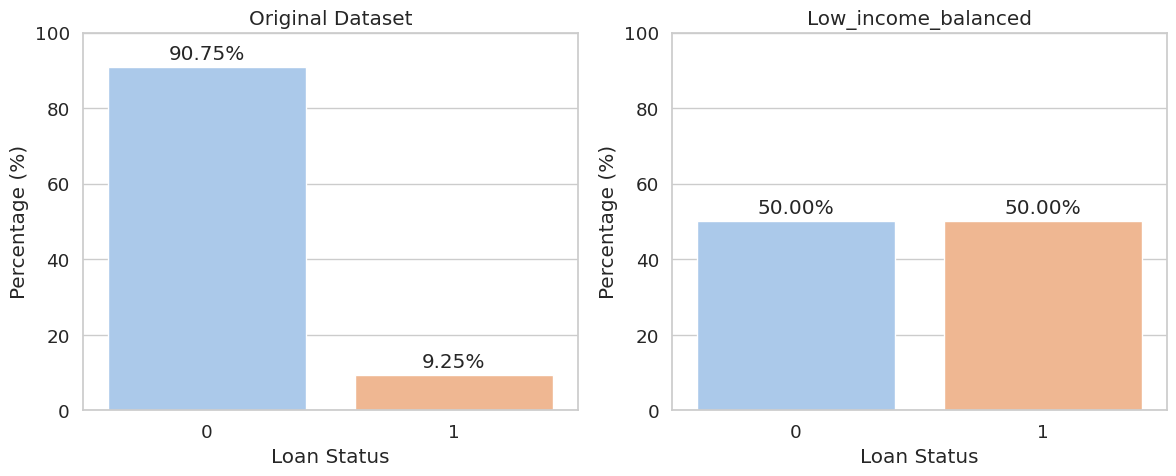

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentages for 'Loan Status' in high_income group
original_percentages = data['Loan Status'].value_counts(normalize=True) * 100
print("Original Dataset:")
print(original_percentages)

# Calculate percentages for 'Loan Status' in balanced high_income dataset
balanced_percentages =low_income_balanced['Loan Status'].value_counts(normalize=True) * 100
print("Balanced Low Income Dataset:")
print(balanced_percentages)

# Plot the distribution side-by-side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Use pastel colors for bars
pastel_palette = sns.color_palette("pastel")

sns.barplot(x=original_percentages.index, y=original_percentages.values, ax=axes[0], palette=pastel_palette)
axes[0].set_title('Original Dataset')
axes[0].set_ylabel('Percentage (%)')
axes[0].set_xlabel('Loan Status')
axes[0].set_ylim(0, 100)  # set y-axis limit to 100 for percentages
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.barplot(x=balanced_percentages.index, y=balanced_percentages.values, ax=axes[1], palette=pastel_palette)
axes[1].set_title('Low_income_balanced')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_xlabel('Loan Status')
axes[1].set_ylim(0, 100)  # set y-axis limit to 100 for percentages
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


# Model Fitting

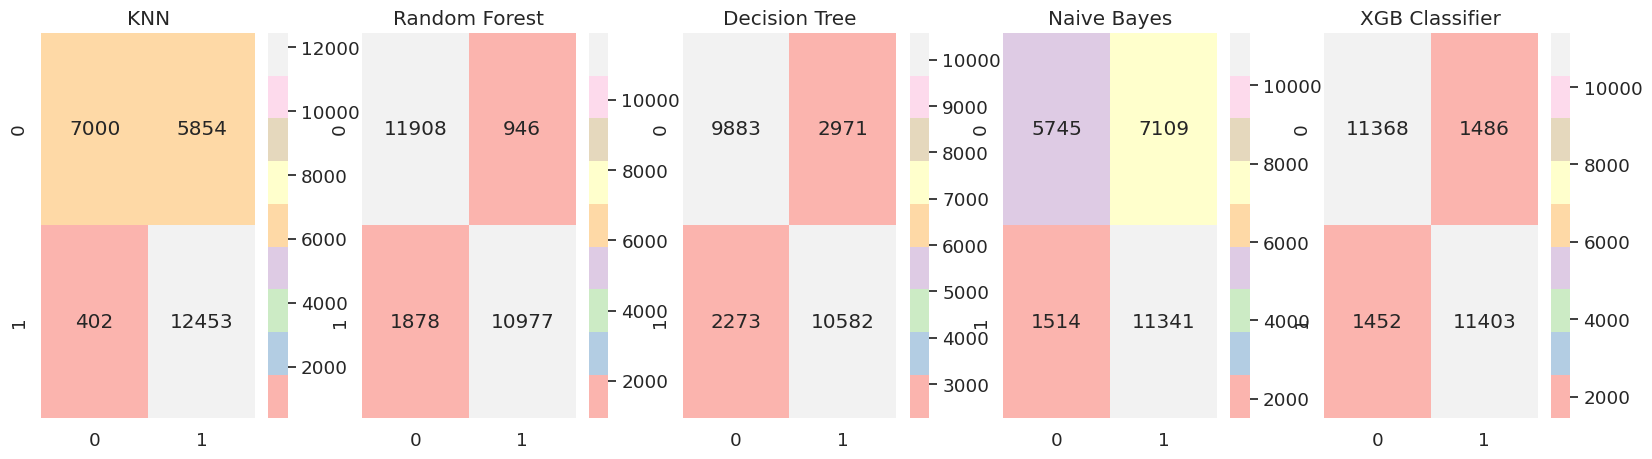

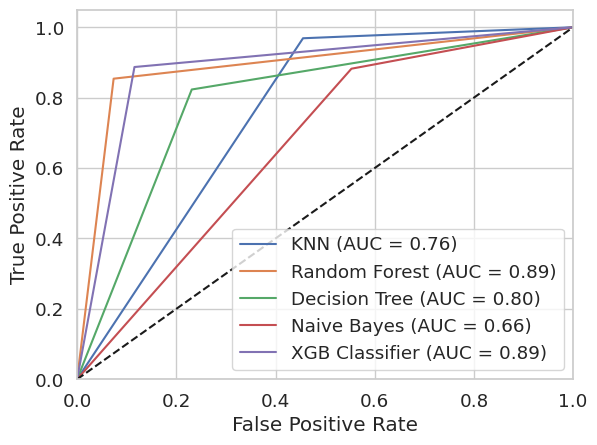

            Model  Accuracy  Precision    Recall  F1-score     Kappa
0             KNN  0.756661   0.680232  0.968728  0.799243  0.513314
1   Random Forest  0.890155   0.920658  0.853909  0.886028  0.780311
2   Decision Tree  0.796025   0.780787  0.823182  0.801424  0.592049
3     Naive Bayes  0.664592   0.614688  0.882225  0.724549  0.329173
4  XGB Classifier  0.885721   0.884708  0.887048  0.885876  0.771442


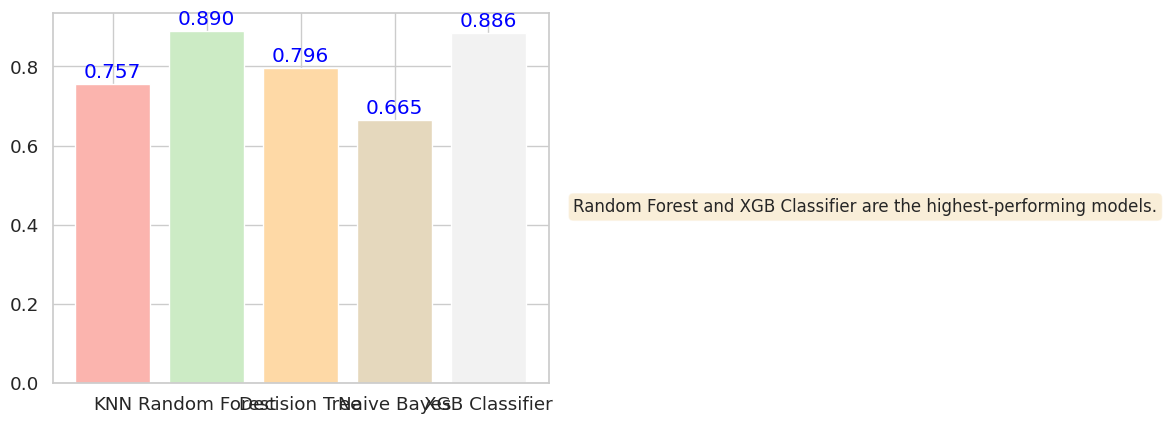

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, cohen_kappa_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Data Preparation
data = pd.read_csv('low_income_balanced.csv')
X = data.drop('Loan Status', axis=1)
y = data['Loan Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Metrics and plots storage
metrics_table = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "Kappa"])
fig1, axs1 = plt.subplots(1, 5, figsize=(20, 5))

# Initialize new ROC curve figure
fig_roc, ax_roc = plt.subplots()

# Models Information
models = {
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGB Classifier": XGBClassifier()
}

# Function to fit and score models
def fit_and_score(model_info, X_train, X_test, y_train, y_test, ax1, ax_roc):
    model = model_info["item"]
    scale = MinMaxScaler()
    X_train_scaled = scale.fit_transform(X_train)
    X_test_scaled = scale.transform(X_test)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Metrics
    model_name = model_info["name"]
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)

    metrics_table.loc[len(metrics_table)] = [model_name, acc, prec, rec, f1, kappa]

    # Confusion Matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Pastel1", fmt='g', ax=ax1)
    ax1.set_title(model_name)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    ax_roc.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Fit models and collect metrics
for i, (name, model) in enumerate(models.items()):
    model_info = {"name": name, "item": model}
    fit_and_score(model_info, X_train, X_test, y_train, y_test, axs1[i], ax_roc)

# Finalize single ROC curve figure
ax_roc.plot([0, 1], [0, 1], 'k--')
ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
ax_roc.legend(loc="lower right")

plt.show()
print(metrics_table)

# Plot accuracies on a separate plot
fig_acc, ax_acc = plt.subplots()
colors = plt.cm.Pastel1(np.linspace(0, 1, len(metrics_table['Model'])))
bars = ax_acc.bar(metrics_table['Model'], metrics_table['Accuracy'], color=colors)
for i, v in enumerate(metrics_table['Accuracy']):
    ax_acc.text(i, v + 0.005, f"{v:.3f}", color='blue', verticalalignment='bottom', ha='center')

# Identify the two best-performing models
highest_models = metrics_table.nlargest(2, 'Accuracy')['Model'].values
annotation_text = f"{highest_models[0]} and {highest_models[1]} are the highest-performing models."

# Add the annotation text in a box to the right of the accuracy plot
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax_acc.text(1.05, 0.5, annotation_text, transform=ax_acc.transAxes, fontsize=12, verticalalignment='top', bbox=props)

plt.show()


#  Model Tune
Machine learning algorithms have hyperparameters that allow you to tailor the behavior of the algorithm to your specific dataset.

Hyperparameters are different from parameters, which are the internal coefficients or weights for a model found by the learning algorithm. Unlike parameters, hyperparameters are specified by the practitioner when configuring the model.

Now, when fitting different values of a hyperparameter, it is essential to use cross-validation as using train test split alone would risk overfitting the hyperparameter to the test set.

Computing and plotting the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, we will develop our intuition for overfitting and underfitting.

In [64]:
pip install optuna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.9 MB/s eta 0:00:00


[I 2023-09-03 23:19:00,550] A new study created in memory with name: no-name-b02a82a4-7941-4451-8fdb-b40649ed4e7b
[I 2023-09-03 23:19:06,726] Trial 0 finished with value: 0.7070600983579228 and parameters: {'n_neighbors': 18}. Best is trial 0 with value: 0.7070600983579228.
[I 2023-09-03 23:19:13,293] Trial 1 finished with value: 0.6645994832041344 and parameters: {'n_neighbors': 27}. Best is trial 0 with value: 0.7070600983579228.
[I 2023-09-03 23:19:20,257] Trial 2 finished with value: 0.7166624989580728 and parameters: {'n_neighbors': 16}. Best is trial 2 with value: 0.7166624989580728.
[I 2023-09-03 23:19:26,912] Trial 3 finished with value: 0.7275652246394932 and parameters: {'n_neighbors': 11}. Best is trial 3 with value: 0.7275652246394932.
[I 2023-09-03 23:19:32,671] Trial 4 finished with value: 0.8547803617571059 and parameters: {'n_neighbors': 1}. Best is trial 4 with value: 0.8547803617571059.
[I 2023-09-03 23:19:37,858] Trial 5 finished with value: 0.726781695423856 and par

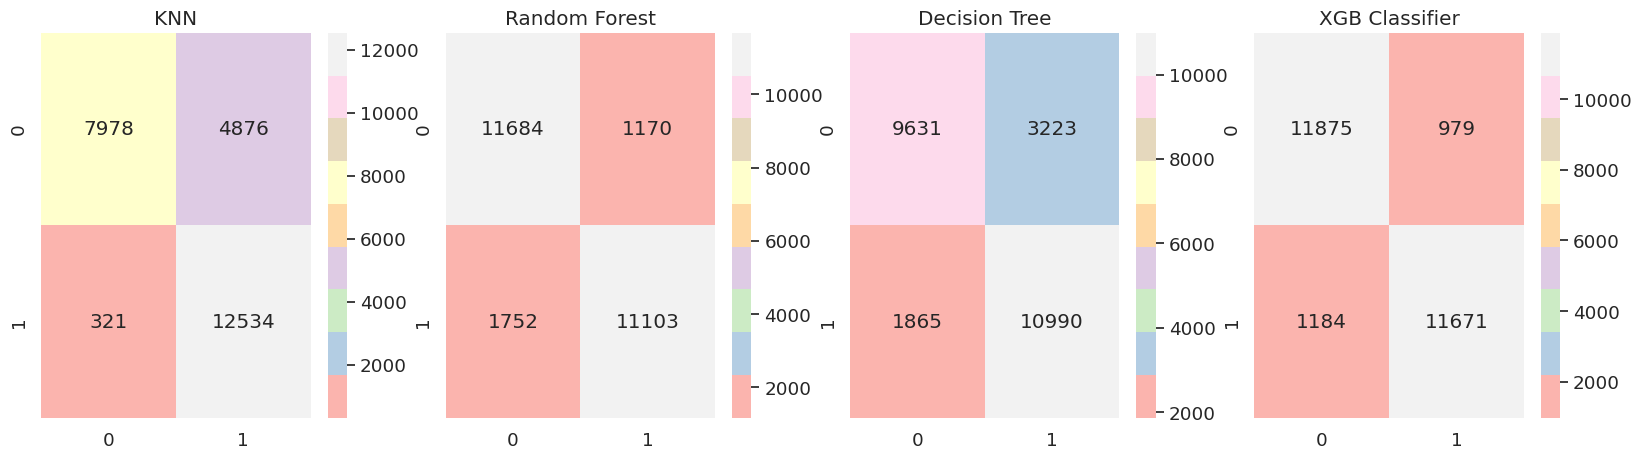

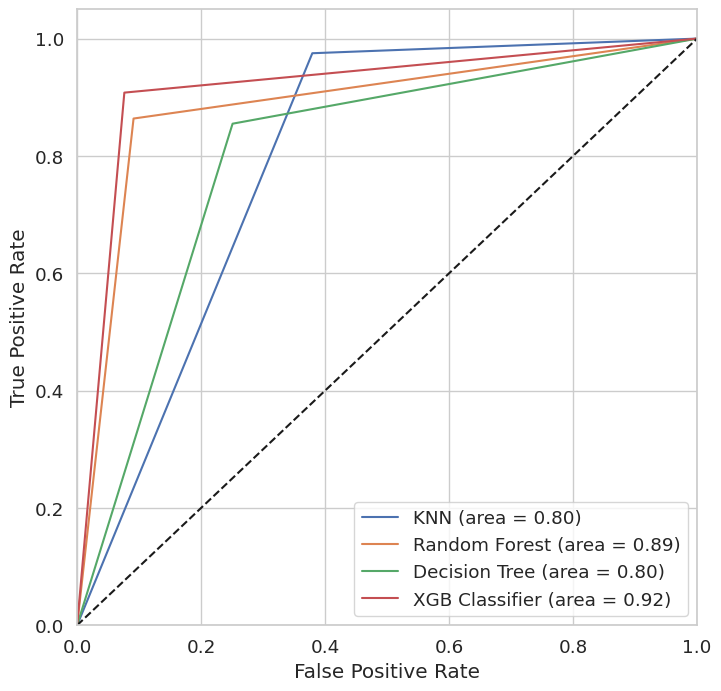

            Model  Accuracy  Precision    Recall  F1-score     Kappa
0             KNN  0.797853   0.719931  0.975029  0.828283  0.595700
1   Random Forest  0.886343   0.904669  0.863711  0.883715  0.772687
2   Decision Tree  0.802093   0.773236  0.854920  0.812029  0.604184
3  XGB Classifier  0.915866   0.922609  0.907896  0.915193  0.831732


['best_model_XGB Classifier.pkl']

In [66]:
import optuna
import joblib
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, cohen_kappa_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

# Initialize variables to hold best model information
best_model = None
best_accuracy = 0
best_model_name = ''

# Data Preparation
data = pd.read_csv('low_income_balanced.csv')
X = data.drop('Loan Status', axis=1)
y = data['Loan Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Metrics and plots storage
metrics_table = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "Kappa"])
fig1, axs1 = plt.subplots(1, 4, figsize=(20, 5))
fig2, axs2 = plt.subplots(1, 1, figsize=(8, 8))

# Models Information
models = {
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGB Classifier": XGBClassifier()
}

# Optuna objective function
def model_objective(trial, model, X, y):
    params = {}
    if model.__class__.__name__ == 'KNeighborsClassifier':
        params['n_neighbors'] = trial.suggest_int('n_neighbors', 1, 30)
    elif model.__class__.__name__ == 'RandomForestClassifier':
        params['n_estimators'] = trial.suggest_int('n_estimators', 2, 150)
        params['max_depth'] = trial.suggest_int('max_depth', 1, 32)
    elif model.__class__.__name__ == 'DecisionTreeClassifier':
        params['max_depth'] = trial.suggest_int('max_depth', 1, 32)
    elif model.__class__.__name__ == 'XGBClassifier':
        params['n_estimators'] = trial.suggest_int('n_estimators', 2, 150)
        params['max_depth'] = trial.suggest_int('max_depth', 1, 10)

    skf = StratifiedKFold(n_splits=5)
    model.set_params(**params)
    return cross_val_score(model, X, y, cv=skf).mean()

# Function to fit and score models
def fit_and_score(model_info, X_train, X_test, y_train, y_test, ax1, ax2):
    global best_model, best_accuracy, best_model_name

    model = model_info["item"]
    model_name = model_info["name"]

    # Hyperparameter tuning using Optuna
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: model_objective(trial, model, X_train, y_train), n_trials=20)
    best_params = study.best_params

    # Scaling
    scale = MinMaxScaler()
    X_train_scaled = scale.fit_transform(X_train)
    X_test_scaled = scale.transform(X_test)

    model.set_params(**best_params)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    if acc > best_accuracy:
        best_model = model
        best_accuracy = acc
        best_model_name = model_name

    # Metrics table
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)

    metrics_table.loc[len(metrics_table)] = [model_name, acc, prec, rec, f1, kappa]

    # Confusion Matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    sn.heatmap(cnf_matrix, annot=True, cmap="Pastel1", fmt='g', ax=ax1)
    ax1.set_title(model_name)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    ax2.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc:.2f})')

# Fit models and collect metrics
for i, (name, model) in enumerate(models.items()):
    model_info = {"name": name, "item": model}
    fit_and_score(model_info, X_train, X_test, y_train, y_test, axs1[i], axs2)

# Finalize ROC curve figure
axs2.plot([0, 1], [0, 1], 'k--')
axs2.set_xlim([0.0, 1.0])
axs2.set_ylim([0.0, 1.05])
axs2.set_xlabel('False Positive Rate')
axs2.set_ylabel('True Positive Rate')
axs2.legend(loc="lower right")

# Show plots and metrics
plt.show()
print(metrics_table)

# Save the best model
joblib.dump(best_model, f'best_model_{best_model_name}.pkl')


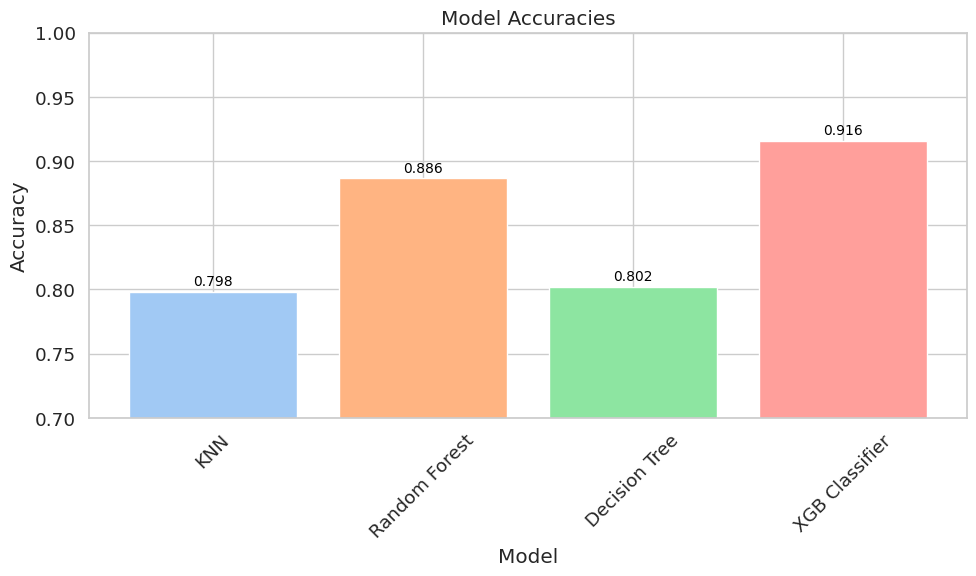

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a pastel color palette
pastel_palette = sns.color_palette("pastel")

# Manual accuracy values
manual_accuracies = [0.797853, 0.886343, 0.802093, 0.915866]

# Model names
model_names = ['KNN', 'Random Forest', 'Decision Tree', 'XGB Classifier']

# Plotting manual accuracies with annotations and pastel colors
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, manual_accuracies, color=pastel_palette)

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracies")
plt.ylim(0.7, 1.0)  # Adjust the y-axis limits as needed

# Annotate bars with accuracy values
for bar, acc in zip(bars, manual_accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, acc + 0.005, f"{acc:.3f}", ha='center', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Permutation Importance:

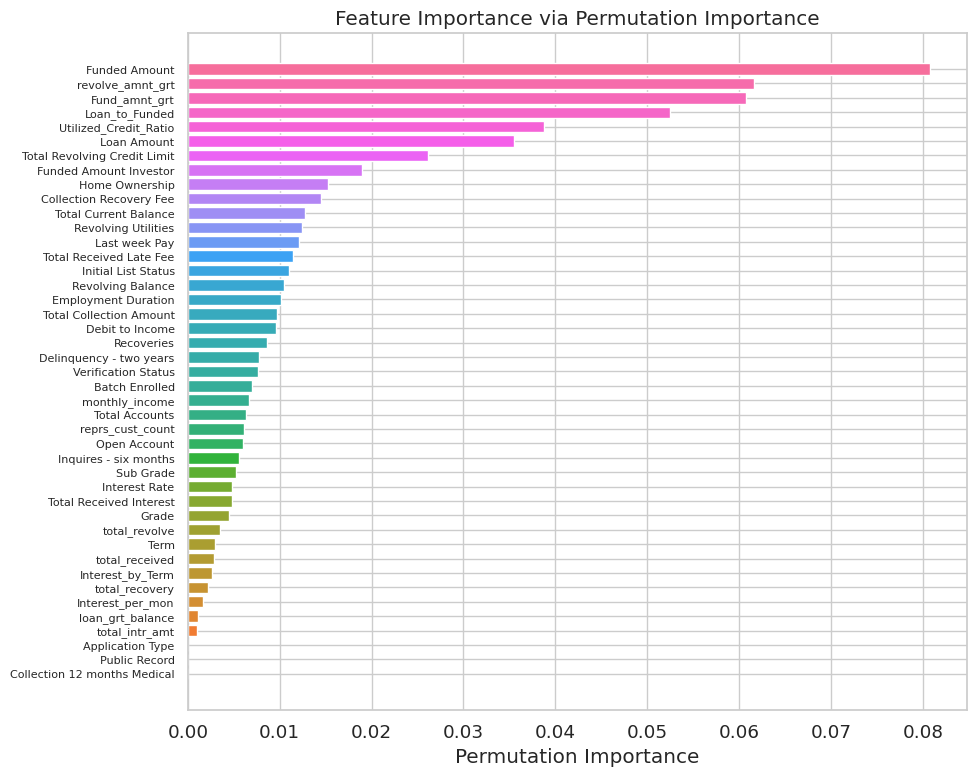

Permutation-based Variable Importance:
                         feature  importance_mean  importance_std
0   Collection 12 months Medical         0.000000        0.000000
1                  Public Record         0.000000        0.000000
2               Application Type         0.000000        0.000000
3                 total_intr_amt         0.001041        0.000413
4               loan_grt_balance         0.001084        0.000133
5               Interest_per_mon         0.001625        0.000411
6                 total_recovery         0.002178        0.000397
7               Interest_by_Term         0.002607        0.000518
8                 total_received         0.002838        0.000478
9                           Term         0.002957        0.000497
10                 total_revolve         0.003466        0.000464
11                         Grade         0.004443        0.000617
12       Total Received Interest         0.004808        0.000496
13                 Interest Rate     

In [67]:
from sklearn.inspection import permutation_importance

# Load the best model
best_model = joblib.load(f'best_model_{best_model_name}.pkl')


# Assuming data is loaded in 'X' and 'y' variables
# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Run Permutation-based Variable Importance on test set
perm_importance = permutation_importance(best_model, X_test_scaled, y_test, n_repeats=30, random_state=42)

# Prepare the feature names
feature_names = X.columns.tolist()

# Sorting the features by importance
sorted_idx = perm_importance.importances_mean.argsort()

# Visualize
palette = sns.color_palette("husl", len(sorted_idx))

plt.figure(figsize=(10, 8))
bars = plt.barh([feature_names[i] for i in sorted_idx], perm_importance.importances_mean[sorted_idx], color=palette)
plt.gca().yaxis.labelpad = 10
plt.yticks(fontsize=8)
plt.xlabel("Permutation Importance")
plt.title("Feature Importance via Permutation Importance")
plt.tight_layout()
plt.show()

# Optional: Create a DataFrame to store the results
pvi_df = pd.DataFrame({
    'feature': [feature_names[i] for i in sorted_idx],
    'importance_mean': perm_importance.importances_mean[sorted_idx],
    'importance_std': perm_importance.importances_std[sorted_idx]
})

print("Permutation-based Variable Importance:")
print(pvi_df)


# Permutation Importance:



# Local Interpretations:

**LIME (Local Interpretable Model-agnostic Explanations) helps you explain individual predictions**

In [68]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=706ba4c200ad977ca5bde31bbe922ef32360f0e031aaa492ac5b97b58fd1480a
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


Recoveries > 5.36: 0.05947299145687704
58.00 < Term <= 59.00: 0.028221841907401134
0.02 < Interest_per_mon <= 0.03: -0.027381641788146092
Application Type <= 0.00: 0.026496186161749126
reprs_cust_count > 2557.00: 0.02427992851792251
40.36 < Revolving Utilities <= 54.39: -0.02196136143677853
total_recovery > 6.13: -0.020591582990893705
total_received <= 728.53: 0.018821928474678746
0.96 < Loan_to_Funded <= 1.57: -0.018372576479817354
loan_grt_balance <= 0.00: -0.01624651248502623


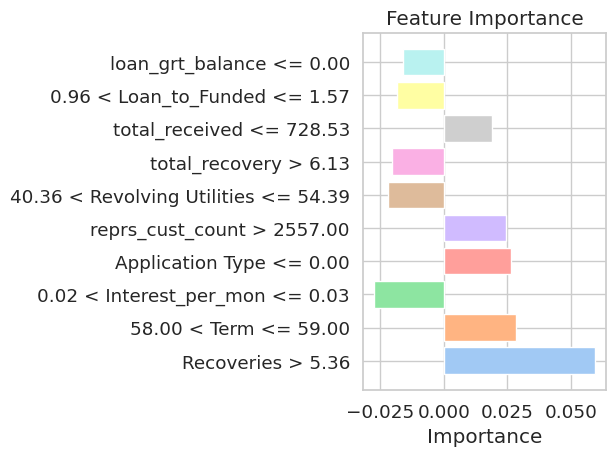

In [90]:
import lime
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize LIME explainer
explainer = LimeTabularExplainer(
    X_train.values,  # Assuming X_train is not scaled
    feature_names=X_train.columns.tolist(),
    class_names=["0", "1"],
    mode='classification'
)

# Choose the instance in the test set you wish to explain. Here, the first instance is chosen.
instance_idx = 0
instance = X_test.iloc[instance_idx].values  # Use original, unscaled data

# Produce explanations
exp = explainer.explain_instance(instance, best_model.predict_proba)

# Display the explanation in the notebook
exp.show_in_notebook()

# Retrieve and plot feature importance
exp_list = exp.as_list()
feature_names = [x[0] for x in exp_list]
feature_values = [x[1] for x in exp_list]

# Printing the feature names and values directly from exp_list
for item in exp_list:
    print(f"{item[0]}: {item[1]}")

# Setting pastel palette for the plot
sns.set_palette("pastel")

# Plotting the feature importance
plt.figure()
plt.barh(feature_names, feature_values, color=sns.color_palette())
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


# Comprehensive Interpretation:

**SHAP values provide both global and local explanations**

In [70]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 8.1 MB/s eta 0:00:00


100%|===================| 25612/25709 [02:52<00:00]       

Feature Name: Loan Amount, Feature Value: 13572.0, SHAP Value: 0.059006452244939285
Feature Name: Funded Amount, Feature Value: 16035.0, SHAP Value: 0.26900610044249335
Feature Name: Funded Amount Investor, Feature Value: 19282.5947199999, SHAP Value: -0.1033215038687922
Feature Name: Term, Feature Value: 59.0, SHAP Value: 0.0633537287544459
Feature Name: Batch Enrolled, Feature Value: 5714674.0, SHAP Value: 0.07900556130800396
Feature Name: Interest Rate, Feature Value: 0.0091734517583333, SHAP Value: -0.030875036872457712
Feature Name: Grade, Feature Value: 2.0, SHAP Value: 0.023997658491134645
Feature Name: Sub Grade, Feature Value: 17.0, SHAP Value: 0.08658650998026132
Feature Name: Home Ownership, Feature Value: 0.0, SHAP Value: -0.032524417489767074
Feature Name: Employment Duration, Feature Value: 45771.0, SHAP Value: -0.04136059269309044
Feature Name: Verification Status, Feature Value: 1.0, SHAP Value: -0.003771009282208979
Feature Name: Debit to Income, Feature Value: 30.3636

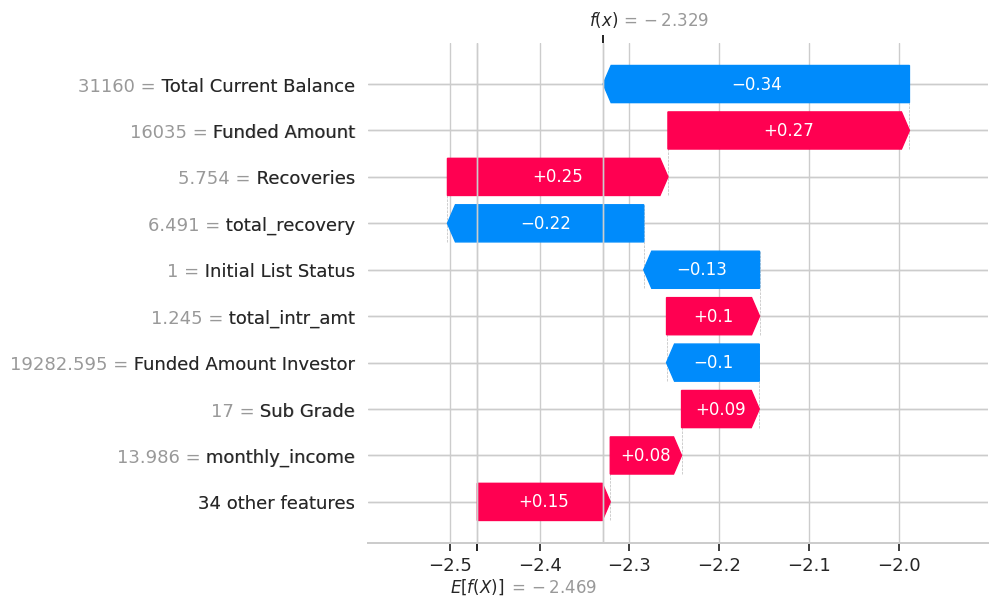

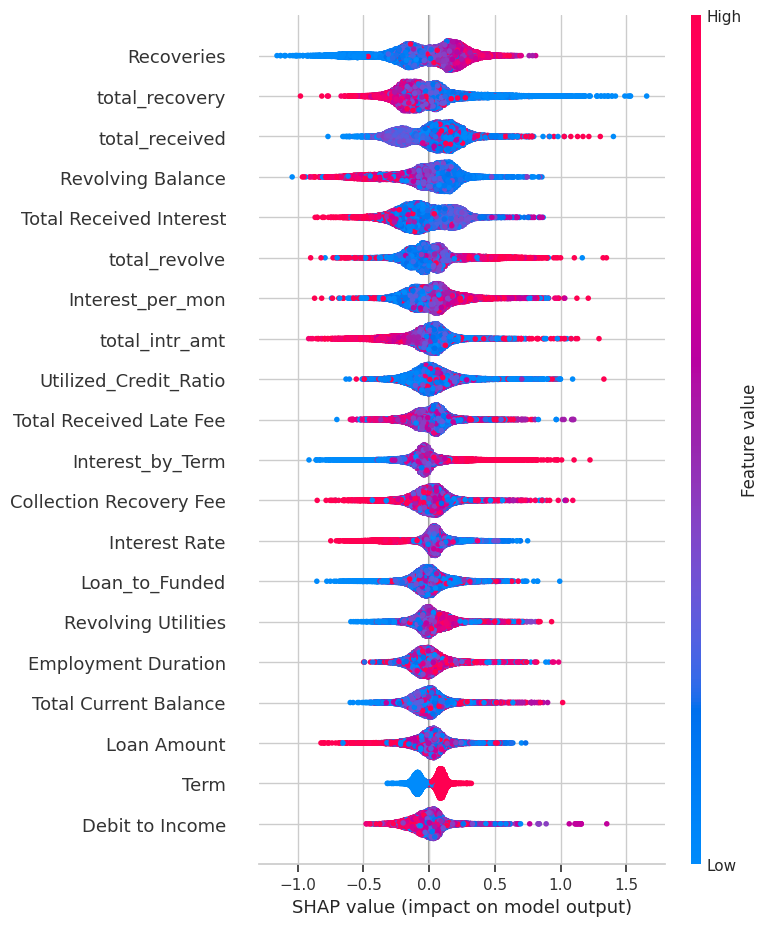

In [93]:
import shap

# Initialize the explainer
explainer = shap.Explainer(best_model, X_test)

# Compute SHAP values for the first instance in the test set
shap_values = explainer(X_test)

# Get the values of the features for the first instance in the test set
feature_values = X_test.iloc[0].values

# Get the names of the features
feature_names = X_test.columns.tolist()

# Print the SHAP values along with feature names and values
for feature_name, feature_val, shap_val in zip(feature_names, feature_values, shap_values.values[0]):
    print(f"Feature Name: {feature_name}, Feature Value: {feature_val}, SHAP Value: {shap_val}")

# Plot the SHAP values for the first instance
shap.plots.waterfall(shap_values[0])

# Or you can plot summary plot for the whole test set
shap.summary_plot(shap_values, X_test)


#  Deep Learning

---




In [72]:
pip install tensorflow


In [73]:
pip install numpy pandas scikit-learn optuna matplotlib


Performance Metrics:
           Single NN  Multi NN  Generic NN  Feedforward DNN
Accuracy    0.740825  0.779975    0.785518         0.864228
Precision   0.743025  0.794594    0.796412         0.837598
Recall      0.729914  0.750382    0.762499         0.900953
F1 Score    0.736411  0.771856    0.779087         0.868121
Kappa       0.481544  0.559729    0.570864         0.728601


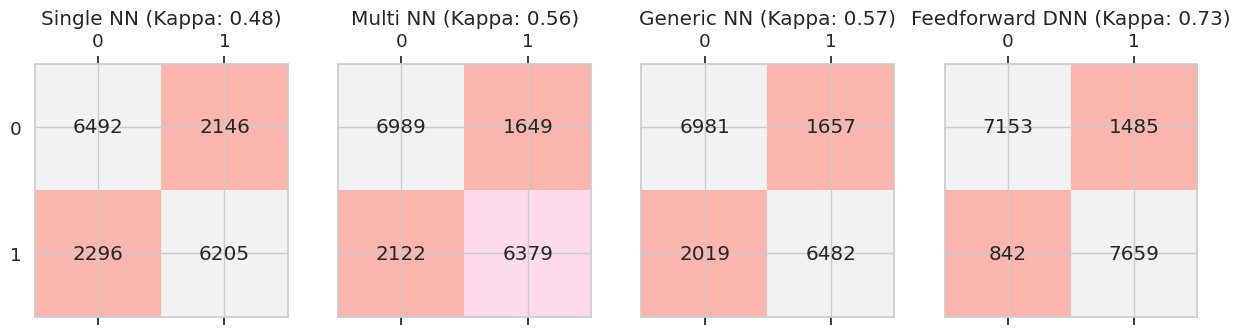

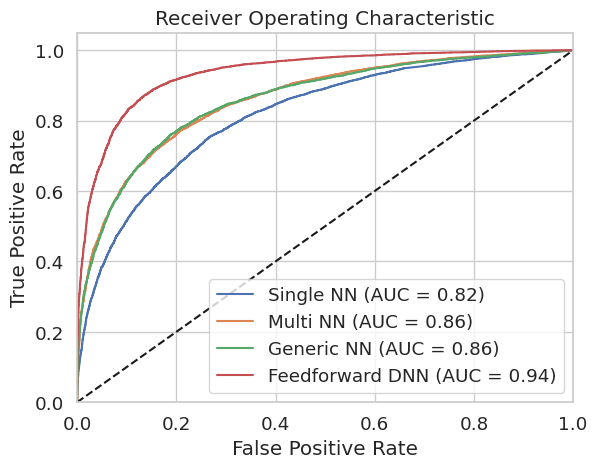

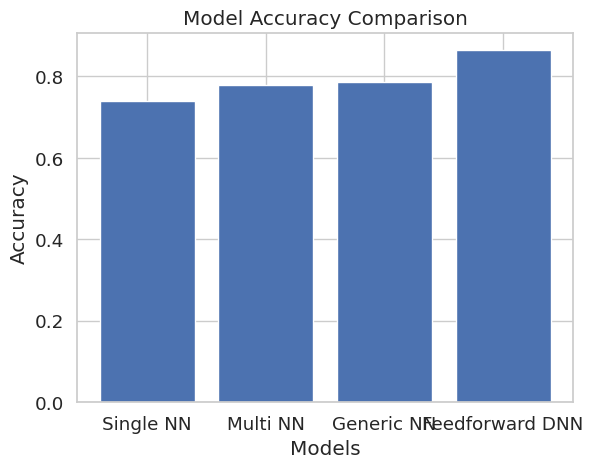

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, cohen_kappa_score

# Load data
data = pd.read_csv('low_income_balanced.csv')

# Separate the target from the features
target = data['Loan Status']
data.drop(columns=['Loan Status'], inplace=True)

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size=0.2, random_state=42)
# Initialize dictionary to store results
results = {}

# Define models
single_nn = MLPClassifier(hidden_layer_sizes=(5,), max_iter=50, activation='relu')
multi_nn = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=50, activation='relu')
generic_nn = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=50, activation='relu')
feedforward_dnn = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=50, activation='relu')

models = {'Single NN': single_nn, 'Multi NN': multi_nn, 'Generic NN': generic_nn, 'Feedforward DNN': feedforward_dnn}
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Kappa']

# Model training and evaluation
fig, axs = plt.subplots(1, len(models), figsize=(15, 5), sharey=True)
roc_fig, roc_ax = plt.subplots()

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), cohen_kappa_score(y_test, y_pred)]

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    axs[i].matshow(cm, cmap='Pastel1')
    for (k, j), z in np.ndenumerate(cm):
        axs[i].text(j, k, str(z), ha='center', va='center')
    axs[i].set_title(f'{name} (Kappa: {cohen_kappa_score(y_test, y_pred):.2f})')

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    roc_ax.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Create DataFrame for metrics
df_metrics = pd.DataFrame(results, index=metrics)

# Display metrics
print("Performance Metrics:")
print(df_metrics)

# ROC curve settings
roc_ax.plot([0, 1], [0, 1], 'k--')
roc_ax.set_xlim([0.0, 1.0])
roc_ax.set_ylim([0.0, 1.05])
roc_ax.set_xlabel('False Positive Rate')
roc_ax.set_ylabel('True Positive Rate')
roc_ax.set_title('Receiver Operating Characteristic')
roc_ax.legend(loc="lower right")

# Show plots
plt.show()

# Plot accuracies
plt.figure()
plt.bar(results.keys(), [val[0] for val in results.values()])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()


# Model Evaluation & Compare on High Income Group

[I 2023-09-04 00:22:01,113] A new study created in memory with name: no-name-2702fab8-470d-4a85-88c4-27f03b0f6fca
[I 2023-09-04 00:22:02,256] Trial 0 finished with value: 0.9079678814082767 and parameters: {'learning_rate': 0.25, 'n_estimators': 50, 'max_depth': 3, 'subsample': 0.75, 'colsample_bytree': 0.75, 'gamma': 0.1, 'alpha': 0.0, 'lambda': 0.0}. Best is trial 0 with value: 0.9079678814082767.
[I 2023-09-04 00:22:04,189] Trial 1 finished with value: 0.9079678814082767 and parameters: {'learning_rate': 0.15000000000000002, 'n_estimators': 250, 'max_depth': 5, 'subsample': 0.5, 'colsample_bytree': 0.75, 'gamma': 0.2, 'alpha': 0.0, 'lambda': 0.2}. Best is trial 0 with value: 0.9079678814082767.
[I 2023-09-04 00:22:19,550] Trial 2 finished with value: 0.9077825818406424 and parameters: {'learning_rate': 0.25, 'n_estimators': 250, 'max_depth': 5, 'subsample': 0.75, 'colsample_bytree': 0.75, 'gamma': 0.1, 'alpha': 0.1, 'lambda': 0.2}. Best is trial 0 with value: 0.9079678814082767.
[I 

The best parameters are {'learning_rate': 0.25, 'n_estimators': 50, 'max_depth': 3, 'subsample': 0.75, 'colsample_bytree': 0.75, 'gamma': 0.1, 'alpha': 0.0, 'lambda': 0.0} with an accuracy score of 0.9079678814082767.
XGBoost Accuracy: 0.907608695652174
XGBoost F1 Score: 0.0
XGBoost Recall: 0.0
XGBoost Precision: 0.0
Kappa Statistic: -0.0004929930227608459


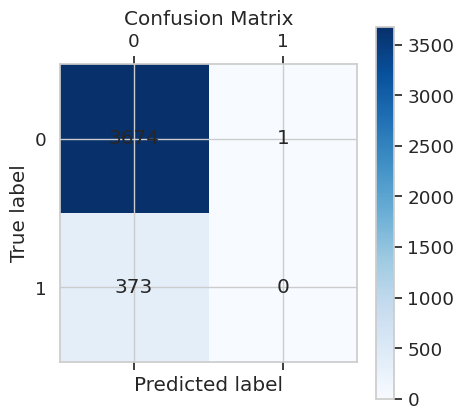

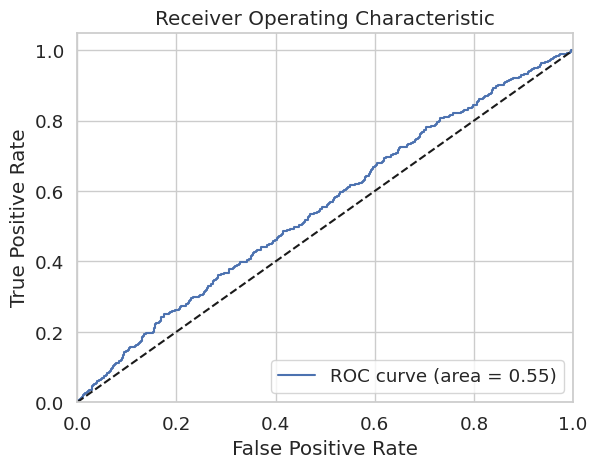

In [75]:
import pandas as pd
import numpy as np
import optuna
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, cohen_kappa_score
import matplotlib.pyplot as plt

# 1. Load the Dataset
low_income = pd.read_csv('/content/high_income.csv')  # Replace with the path to your dataset

# 2. Preprocess the Dataset
X = low_income.drop('Loan Status', axis=1)
y = low_income['Loan Status']

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Hyperparameter Optimization and Model Training
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'booster': 'gbtree',
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.3, step=0.05),
        'n_estimators': trial.suggest_categorical('n_estimators', [50, 100, 250]),
        'max_depth': trial.suggest_categorical('max_depth', [3, 5, 7]),
        'subsample': trial.suggest_categorical('subsample', [0.5, 0.75, 1]),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.5, 0.75, 1]),
        'gamma': trial.suggest_float('gamma', 0, 0.2, step=0.1),
        'alpha': trial.suggest_float('alpha', 0, 0.2, step=0.1),
        'lambda': trial.suggest_float('lambda', 0, 0.2, step=0.1)
    }

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = []

    for train_idx, val_idx in skf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model = xgb.XGBClassifier(**param, n_jobs=-1)
        model.fit(X_train_fold, y_train_fold, eval_set=[(X_val_fold, y_val_fold)], early_stopping_rounds=10, verbose=False)

        y_pred_fold = model.predict(X_val_fold)
        accuracies.append(accuracy_score(y_val_fold, y_pred_fold))

    return np.mean(accuracies)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

best_params = study.best_params
best_score = study.best_value

print(f"The best parameters are {best_params} with an accuracy score of {best_score}.")

# 5. Final Model Training
best_model = xgb.XGBClassifier(**best_params, n_jobs=-1)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# 6. Metrics and Plots
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("XGBoost F1 Score:", f1_score(y_test, y_pred))
print("XGBoost Recall:", recall_score(y_test, y_pred))
print("XGBoost Precision:", precision_score(y_test, y_pred))
print("Kappa Statistic:", cohen_kappa_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Annotate the cells with the numerical values
for i in range(len(cm)):
    for j in range(len(cm[i])):
        plt.text(j, i, str(cm[i][j]), va='center', ha='center')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


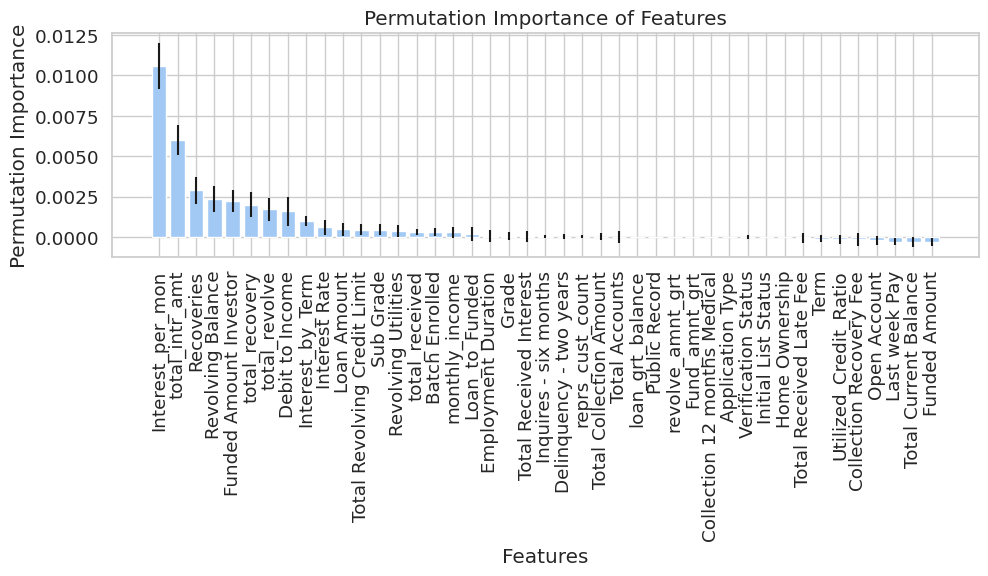

In [104]:
from sklearn.inspection import permutation_importance

# Compute Permutation Importance
perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)

# Get feature importances and their standard deviations
importances = perm_importance.importances_mean
std_devs = perm_importance.importances_std

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]

# Plot Permutation Importance
plt.figure(figsize=(10, 6))
plt.bar(range(X_test.shape[1]), importances[sorted_indices], yerr=std_devs[sorted_indices], align='center')
plt.xticks(range(X_test.shape[1]), np.array(feature_names)[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Permutation Importance')
plt.title('Permutation Importance of Features')
plt.tight_layout()
plt.show()


In [105]:
from lime.lime_tabular import LimeTabularExplainer

# Create an explainer for LIME
explainer = LimeTabularExplainer(X_train.values, mode='classification', feature_names=feature_names, training_labels=y_train)

# Choose an index of the instance you want to explain
i = 0

# Explain the prediction for the selected instance using LIME
explanation = explainer.explain_instance(X_test.values[i], best_model.predict_proba)

# Show the explanation
explanation.show_in_notebook()


# RISK ASSESMENT MODEL


In [76]:

# PVI
# PVI (Partial Dependence Plots)
feature_names = X.columns
features = [0, 1]  # Select indices of features for which you want to plot PVI

fig, ax = plot_partial_dependence(best_model, X_train, features=features, feature_names=feature_names, grid_resolution=50)
plt.suptitle('Partial Dependence Plots')
plt.subplots_adjust(top=0.9)
plt.show()

# LIME
# LIME (Local Interpretable Model-Agnostic Explanations)
explainer = LimeTabularExplainer(X_train.values, mode='classification', feature_names=feature_names, training_labels=y_train)
i = 0  # Index of the instance you want to explain
explanation = explainer.explain_instance(X_test.values[i], best_model.predict_proba)
explanation.show_in_notebook()

# SHAP
# SHAP (SHapley Additive exPlanations)
explainer_shap = shap.Explainer(best_model)
shap_values = explainer_shap(X_test)
shap.summary_plot(shap_values, X_test, feature_names=feature_names)
Please make sure to fill in the appropriate hyperparameter optimization code, metrics, confusion matrix, ROC curve, and any other specific parts that are relevant to your use case. Additionally, ensure that you have the required libraries (optuna, xgboost, lime, shap) installed in your environment.





import optuna
import xgboost as xgb
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

# Load data
data = pd.read_csv('/content/updated_data.csv')
X = data.drop('Loan Status', axis=1)
y = data['Loan Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    # Define hyperparameter search space
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'booster': 'gbtree',
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.3, step=0.05),
        'n_estimators': trial.suggest_categorical('n_estimators', [50, 100, 250]),
        'max_depth': trial.suggest_categorical('max_depth', [3, 5, 7]),
        'subsample': trial.suggest_categorical('subsample', [0.5, 0.75, 1]),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.5, 0.75, 1]),
        'gamma': trial.suggest_float('gamma', 0, 0.2, step=0.1),
        'alpha': trial.suggest_float('alpha', 0, 0.2, step=0.1),
        'lambda': trial.suggest_float('lambda', 0, 0.2, step=0.1)
    }

    # Train model
    model = xgb.XGBClassifier(**param, n_jobs=-1)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)

    # Predict
    y_pred = model.predict(X_test)

    # Calculate accuracy
    return accuracy_score(y_test, y_pred)

# Create a study object and specify the direction is maximization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Print the result
best_params = study.best_params
best_score = study.best_value
print(f"The best parameters are {best_params} with an accuracy score of {best_score}.")

# Train the best model
best_model = xgb.XGBClassifier(**best_params, n_jobs=-1)
best_model.fit(X_train, y_train)

# Evaluate the best model
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

# Risk assessment function
def risk_assessment(probabilities):
    risk_levels = []
    for prob in probabilities:
        if prob > 0.60:  # threshold for High Risk
            risk_levels.append("High Risk")
        elif 0.25 <= prob <= 0.60:  # threshold for Moderate Risk
            risk_levels.append("Moderate Risk")
        else:
            risk_levels.append("Low Risk")
    return risk_levels

# Predict probabilities for the entire dataset
all_probs = best_model.predict_proba(X)[:, 1]

# Assess risk for all observations
all_risk_levels = risk_assessment(all_probs)

# Add the Risk columns to the dataset
data['Risk Probability'] = all_probs
data['Risk Levels'] = all_risk_levels

# Display the first few rows of the Risk features
print(data[['Risk Probability', 'Risk Levels']].head())


[I 2023-09-04 00:23:08,113] A new study created in memory with name: no-name-40da40ea-8997-49d0-beab-ee161ee12de3
[I 2023-09-04 00:23:09,063] Trial 0 finished with value: 0.9097309716149115 and parameters: {'learning_rate': 0.2, 'n_estimators': 250, 'max_depth': 5, 'subsample': 0.5, 'colsample_bytree': 0.5, 'gamma': 0.1, 'alpha': 0.1, 'lambda': 0.2}. Best is trial 0 with value: 0.9097309716149115.
[I 2023-09-04 00:23:12,017] Trial 1 finished with value: 0.9097309716149115 and parameters: {'learning_rate': 0.1, 'n_estimators': 50, 'max_depth': 7, 'subsample': 0.75, 'colsample_bytree': 0.75, 'gamma': 0.2, 'alpha': 0.2, 'lambda': 0.0}. Best is trial 0 with value: 0.9097309716149115.
[I 2023-09-04 00:23:13,444] Trial 2 finished with value: 0.9093604091010153 and parameters: {'learning_rate': 0.3, 'n_estimators': 250, 'max_depth': 7, 'subsample': 0.5, 'colsample_bytree': 1, 'gamma': 0.2, 'alpha': 0.2, 'lambda': 0.1}. Best is trial 0 with value: 0.9097309716149115.
[I 2023-09-04 00:23:16,654

The best parameters are {'learning_rate': 0.2, 'n_estimators': 250, 'max_depth': 5, 'subsample': 0.5, 'colsample_bytree': 0.5, 'gamma': 0.1, 'alpha': 0.1, 'lambda': 0.2} with an accuracy score of 0.9097309716149115.
Accuracy: 0.9075075965315349
F1 Score: 0.009523809523809525
Recall: 0.0049261083743842365
Precision: 0.14285714285714285
   Risk Probability Risk Levels
0          0.012974    Low Risk
1          0.053725    Low Risk
2          0.068240    Low Risk
3          0.173039    Low Risk
4          0.054727    Low Risk


In [77]:
# Get the count of each risk level
risk_counts = data['Risk Levels'].value_counts()

# Print the counts
print(risk_counts)



Low Risk         63700
Moderate Risk     3462
High Risk          301
Name: Risk Levels, dtype: int64


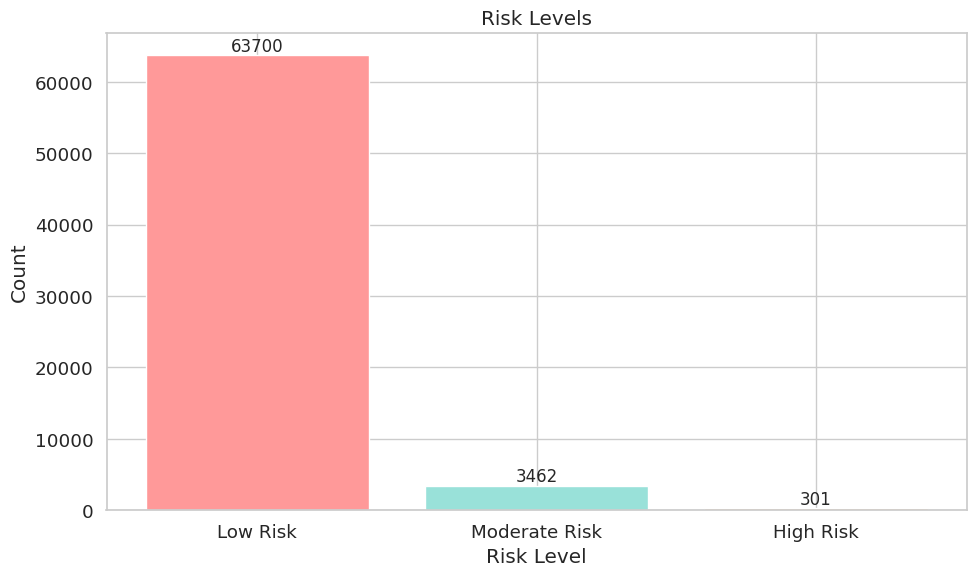

In [78]:
import matplotlib.pyplot as plt

# Get the count of each risk level
risk_counts = data['Risk Levels'].value_counts()

# Plot the counts with pastel colors
plt.figure(figsize=(10, 6))
pastel_colors = ['#FF9999', '#99E1D9', '#FFCC99']  # Pastel Red, Pastel Blue, Pastel Orange
bars = plt.bar(risk_counts.index, risk_counts.values, color=pastel_colors)

# Add counts on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, yval, ha='center', va='bottom', fontsize=12)

plt.title('Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
